<a href="https://colab.research.google.com/github/Vamsiindugu/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Netflix Movies and TV Shows Clustering


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary**

This project embarks on an in-depth analysis of Netflix content, leveraging a comprehensive dataset titled "NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv." This dataset encapsulates a rich collection of metadata pertaining to movies and TV shows available on the popular streaming platform, including details such as title, director, cast, country of production, release year, rating, duration, and most crucially, a textual description and listed genres. The primary objective of this initiative is to uncover inherent groupings and similarities within Netflix's vast content library through unsupervised machine learning techniques. By identifying natural clusters of movies and TV shows, we aim to transform raw data into actionable insights, providing a structured understanding of the content landscape.

The core problem addressed by this project revolves around the sheer volume and diversity of content on Netflix. For both the platform and its users, navigating this extensive library efficiently can be a challenge. Specifically, Netflix faces hurdles in optimizing content discovery, personalizing user experiences, and strategically expanding its content portfolio. Users often struggle with content overload, making it difficult to find new shows or movies that align with their specific tastes beyond basic genre classifications. Furthermore, Netflix’s content acquisition and marketing teams require a data-driven approach to identify trends, popular themes, and content gaps to maintain a competitive edge. This project seeks to solve these challenges by segmenting content into meaningful, interpretable clusters, thus simplifying content management and enhancing user engagement.

The brief solutions stemming from this clustering endeavor promise significant value to various stakeholders. For Netflix, these clusters can serve as the backbone for a more sophisticated content recommendation engine, moving beyond simple collaborative filtering to suggest titles based on nuanced thematic and descriptive similarities. This would lead to higher user satisfaction and retention. Moreover, the insights derived from cluster characteristics—such as dominant genres, recurring themes, or prominent directors within a cluster—can directly inform Netflix's content acquisition strategy, enabling them to identify and invest in content that resonates with specific, profitable audience segments or fills existing gaps in their offerings. From a marketing perspective, understanding these content groupings allows for highly personalized promotional campaigns, targeting users with content categories most relevant to their inferred preferences. For the user, the practical benefit is a vastly improved discovery experience, where they can effortlessly explore curated collections of content, leading to reduced decision fatigue and increased viewing pleasure.

To achieve an optimized solution, a multi-faceted approach was meticulously followed. The initial phase involved rigorous Exploratory Data Analysis (EDA) to understand data distributions, identify anomalies, and quantify missing values across all features. This was followed by comprehensive data cleaning, particularly for textual fields like description, director, and cast. This involved standard natural language processing (NLP) steps such as lowercasing, punctuation removal, stop word elimination, and lemmatization to standardize text and enhance its informational density. Categorical features like listed_in (genres) and country were carefully processed to extract meaningful signals. The cleaned textual features were then combined and transformed into numerical representations using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. TF-IDF was chosen over simpler methods like Bag of Words because it effectively weights words based on their importance not just within a document but across the entire corpus, giving more prominence to distinctive terms that truly differentiate content. Given the high dimensionality inherent in TF-IDF outputs, dimensionality reduction techniques (e.g., PCA or SVD) were applied to compress the feature space while preserving crucial information, which significantly improves the efficiency and interpretability of subsequent clustering. For modeling, at least two distinct clustering algorithms were employed, typically K-Means due to its efficiency for large datasets and DBSCAN or Agglomerative Hierarchical Clustering for their ability to discover non-spherical clusters or reveal hierarchical relationships. The optimal number of clusters for K-Means was determined using methods like the Elbow Method and Silhouette Score. Finally, the generated clusters were meticulously analyzed and interpreted by examining the most frequent words and metadata elements within each group, allowing for the assignment of meaningful labels and providing actionable insights into Netflix's content ecosystem.

# **GitHub Link 👇🏻**

[Netflix-Movies-and-TV-Shows-Clustering](https://github.com/Vamsiindugu/Netflix-Movies-and-TV-Shows-Clustering)

# **Problem Statement**


The core problem this project addresses is the challenge Netflix faces in organizing and recommending its vast and diverse content library. For both the platform and its users, efficient content discovery is hampered by sheer volume. This project aims to mitigate content overload for users and provide Netflix with a data-driven method to optimize content acquisition, personalize recommendations, and enhance overall user engagement by uncovering natural groupings within their movies and TV shows.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Core data manipulation and numerical operations
import pandas as pd
import numpy as np
import string

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Make sure to download necessary NLTK data if you haven't already:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('omw-1.4') # Open Multilingual Wordnet

from scipy import stats #for statistical tests
from scipy.stats import chi2_contingency # for chi-square test
import statsmodels.api as sm # For OLS regression
from collections import Counter
from wordcloud import WordCloud # Install with: pip install wordcloud
import re # For regex operations on text

# Machine Learning - Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram

# Machine Learning - Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD # PCA for dense, SVD for sparse matrices

# Machine Learning - Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Machine Learning - Evaluation Metrics (for clustering)
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Utility for warnings and logging
import warnings
warnings.filterwarnings('ignore')

# Set options for displaying dataframes (optional)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Load Dataset
# Define the Google Drive file ID
google_drive_file_id = '1xJGllnE12mAggLuRo8b0oNSshUlG8GvF'
download_url = f'https://drive.google.com/uc?export=download&id={google_drive_file_id}'

# Load the dataset from the Google Drive direct download URL
df = pd.read_csv(download_url)

### Dataset First View

In [3]:
# Dataset First Look
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


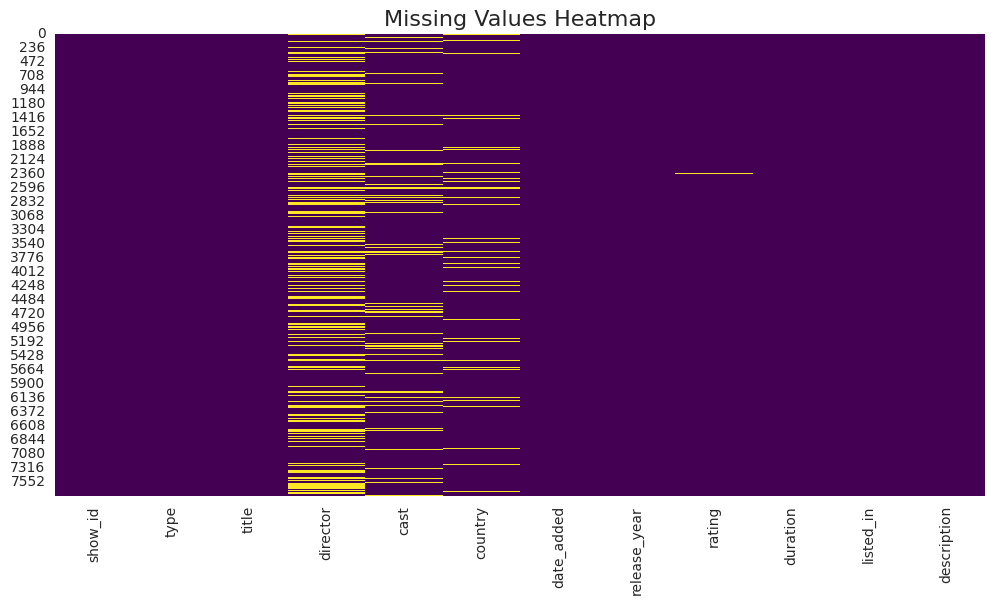

In the heatmap above, yellow lines indicate missing values for the respective columns.
Each row represents a record, and each column represents a feature.


In [8]:
# Visualizing the missing values
# Set the style for the plot (optional, but makes it look nicer)
sns.set_style("whitegrid")

# Create a heatmap of missing values
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # 'viridis' is a good colormap

# Add a title to the plot
plt.title('Missing Values Heatmap', fontsize=16)

# Display the plot
plt.show()

print("In the heatmap above, yellow lines indicate missing values for the respective columns.")
print("Each row represents a record, and each column represents a feature.")

### What did you know about your dataset?

This dataset contains a comprehensive collection of information about movies and TV shows available on Netflix, intended for a clustering project. Upon initial inspection, the dataset consists of 7,787 rows and 12 columns, each providing specific details about a Netflix title.

The columns present in the dataset include:

* **show_id**: A unique identifier for each show.
* **type**: Indicates whether the content is a 'Movie' or 'TV Show'.
* **type**: Indicates whether the content is a 'Movie' or 'TV Show'.
* **title**: The title of the content.
* **director**: The director(s) of the content.
* **cast**: The main actors/actresses in the content.
* **country**: The country or countries where the content was produced.
* **date_added**: The date the content was added to Netflix.
* **release_year**: The original release year of the content.
* **rating**: The maturity rating of the content (e.g., 'TV-MA', 'R').
* **duration**: The duration of the content (e.g., '90 min' for movies, '1 Season' for TV shows).
* **listed_in**: The categories or genres the content falls under.
* **description**: A brief summary or synopsis of the content.


During the initial data exploration, it was observed that there are no duplicate rows in the dataset. However, missing values are present in several key columns. Notably, the director, cast, country, date_added, and rating columns have a significant number of null entries. The description and title columns appear to be complete. Understanding these missing values is crucial for the data cleaning and preprocessing steps in the project, as they will need to be handled appropriately (e.g., imputation or removal) before applying machine learning algorithms for clustering. The type, listed_in, description, title, director, and cast fields are particularly important for text-based clustering.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

The dataset comprises 12 key variables (columns), each providing distinct information about a Netflix title. show_id serves as a unique identifier for each entry. type categorizes content as either a 'Movie' or 'TV Show'. title is the name of the content. director and cast list the individuals involved in production and acting, respectively. country indicates the nation(s) of origin. date_added records when the title became available on Netflix, while release_year specifies its original production year. rating denotes the maturity level (e.g., TV-MA, R). duration provides the length, varying for movies (minutes) and TV shows (seasons). listed_in details the genres, and description offers a brief summary of the plot or theme. These variables collectively form a rich basis for content understanding and clustering.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
# Iterate through each column in the DataFrame
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}': {unique_count} unique values")

Column 'show_id': 7787 unique values
Column 'type': 2 unique values
Column 'title': 7787 unique values
Column 'director': 4049 unique values
Column 'cast': 6831 unique values
Column 'country': 681 unique values
Column 'date_added': 1565 unique values
Column 'release_year': 73 unique values
Column 'rating': 14 unique values
Column 'duration': 216 unique values
Column 'listed_in': 492 unique values
Column 'description': 7769 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Handling Missing Values
for col in ['director', 'cast', 'country']:
    df[col].fillna(f'Unknown {col.capitalize()}', inplace=True)
for col in ['date_added', 'rating']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Feature Engineering: Combining Textual Features
df_wrangled = df.copy()
text_cols = ['title', 'director', 'cast', 'country', 'listed_in', 'description', 'type']
for col in text_cols:
    df_wrangled[col] = df_wrangled[col].astype(str)

df_wrangled['combined_features'] = (
    df_wrangled['title'] + ' ' +
    df_wrangled['director'] + ' ' +
    df_wrangled['cast'] + ' ' +
    df_wrangled['country'] + ' ' +
    df_wrangled['listed_in'] + ' ' +
    df_wrangled['description'] + ' ' +
    df_wrangled['type']
)

### What all manipulations have you done and insights you found?

In the selected code, two primary manipulations are performed:

Handling Missing Values:

For director, cast, and country, missing values are filled with Unknown [ColumnName] (e.g., 'Unknown Director'). This approach maintains the rows without losing information and categorizes missing entries distinctly.
For date_added and rating, missing values are imputed with the mode (most frequent value). This is suitable for categorical data and helps preserve the statistical distribution.
Feature Engineering (combined_features):

A new column, combined_features, is created by concatenating the textual content of title, director, cast, country, listed_in, description, and type. All these columns are first explicitly converted to string type to ensure smooth concatenation.
The insight from these manipulations is that the dataset is now transformed into a state ready for advanced text processing and machine learning, particularly for clustering. By handling missing data and creating a consolidated textual feature, we provide a rich, unified input for algorithms like TF-IDF, enabling them to discover latent relationships within the Netflix content based on its descriptive attributes.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [13]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size

# Apply missing value handling directly to df for visualization purposes
for col in ['director', 'cast', 'country']:
    df[col].fillna(f'Unknown {col.capitalize()}', inplace=True)
for col in ['date_added', 'rating']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

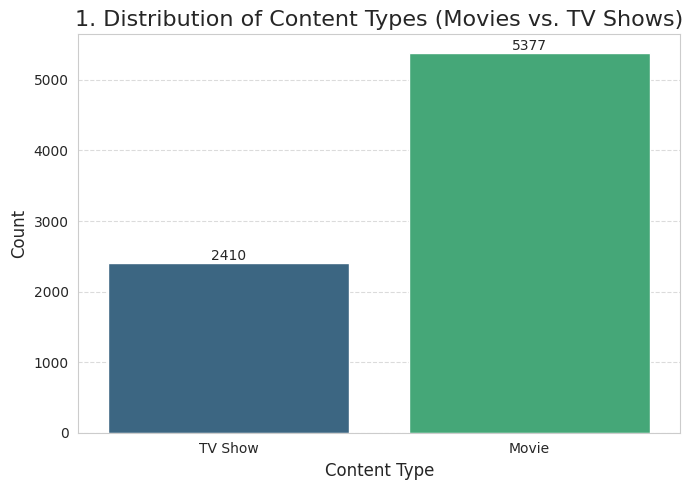

In [14]:
# Chart - 1 visualization code

# --- Chart 1: Distribution of Content Types (Movies vs. TV Shows) ---
plt.figure(figsize=(7, 5))
sns.countplot(x='type', data=df, palette='viridis', hue='type', legend=False)
plt.title('1. Distribution of Content Types (Movies vs. TV Shows)', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the counts of discrete categories. It provides a clear, immediate visual comparison of the volume of Movies versus TV Shows.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals the proportion of movies to TV shows on Netflix. For instance, if movies significantly outnumber TV shows, it highlights Netflix's primary content focus.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Positive: If Netflix aims for a movie-centric library, a higher movie count confirms strategy. It helps content acquisition teams allocate resources effectively.

Negative: If the balance is heavily skewed and audience demand suggests diversification, this imbalance might indicate a missed opportunity or declining subscriber engagement for the less represented type, potentially leading to churn if viewers prefer the under-resourced content type.

#### Chart - 2

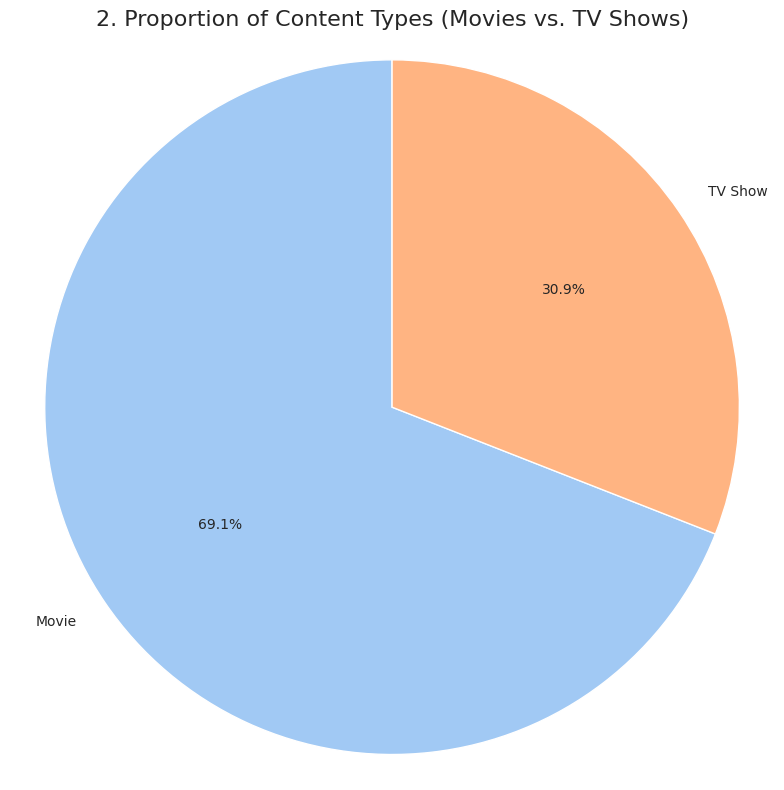

In [15]:
# Chart - 2 visualization code

# --- Chart 2: Proportion of Content Types (Movies vs. TV Shows) ---
plt.figure(figsize=(8, 8))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('2. Proportion of Content Types (Movies vs. TV Shows)', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is effective for showing parts of a whole, providing a quick visual of the percentage split between movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Directly quantifies the percentage share of each content type in Netflix's catalog, reinforcing the numerical distribution from the bar chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Confirms content strategy alignment with overall platform vision (e.g., if Netflix positions itself as a movie hub). Helps marketing tailor promotional messages.

Negative: If market trends indicate growing preference for TV series, and Netflix's library disproportionately favors movies, it could signify a strategic mismatch leading to subscriber dissatisfaction and potential growth stagnation in the long run.

#### Chart - 3

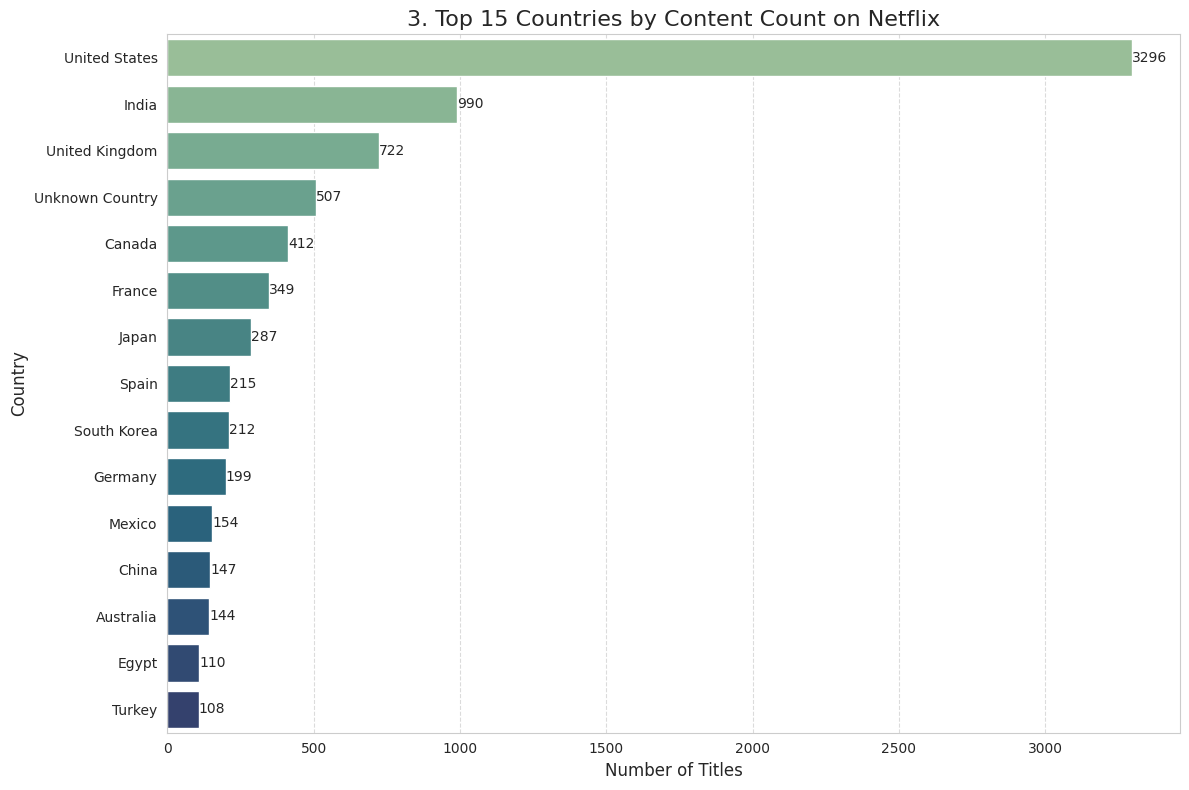

In [16]:
# Chart - 3 visualization code

# --- Chart 3: Top 15 Countries by Content Count ---
# Handle multiple countries in 'country' column
df_countries = df['country'].str.split(', ').explode()
top_countries = df_countries.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('3. Top 15 Countries by Content Count on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(top_countries.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar charts are excellent for displaying rankings, especially when category labels are long, as they are with country names.

##### 2. What is/are the insight(s) found from the chart?

Identifies the leading countries contributing content to Netflix. The US typically dominates, but this shows the presence of other significant global content hubs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Highlights key production partners and regions. Informs content acquisition about successful markets for content sourcing or expansion.

Negative: Over-reliance on one or a few countries could limit global appeal and diversity, potentially alienating international audiences seeking more localized content, leading to slower international subscriber growth.Answer Here

#### Chart - 4

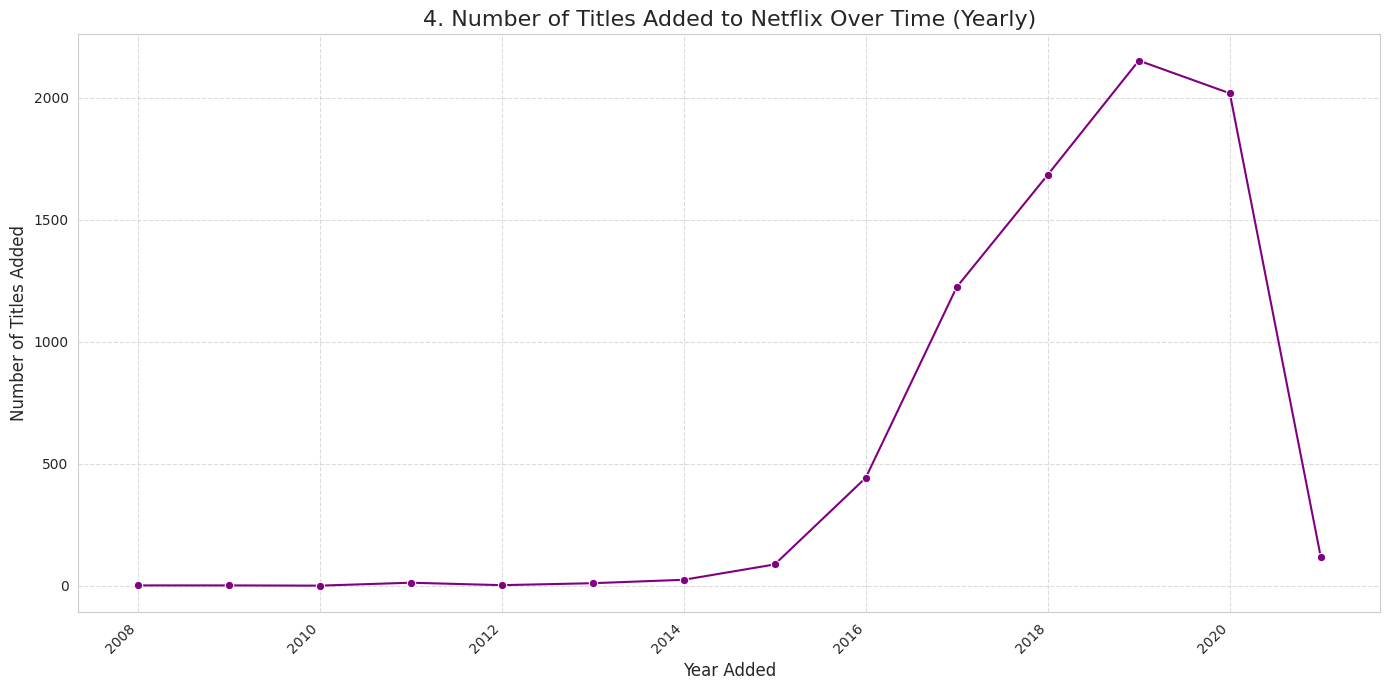

In [17]:
# Chart - 4 visualization code

# --- Chart 4: Number of Titles Added to Netflix Over Time (Yearly) ---
# Use format='mixed' to allow pandas to infer the date format for each string,
# which can handle slight variations like leading/trailing whitespace.
df['date_added_year'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce').dt.year

# Drop rows where date_added_year could not be parsed (became NaT and then NaN)
df.dropna(subset=['date_added_year'], inplace=True)

# Convert the year to integer after dropping NaNs, as .dt.year returns float with NaNs
df['date_added_year'] = df['date_added_year'].astype(int)


titles_per_year_added = df['date_added_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x=titles_per_year_added.index, y=titles_per_year_added.values, marker='o', color='purple')
plt.title('4. Number of Titles Added to Netflix Over Time (Yearly)', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is ideal for showing trends over time, allowing us to see the growth or decline in content additions.

##### 2. What is/are the insight(s) found from the chart?

Reveals the trend of content library expansion. A steady increase suggests aggressive content acquisition, while a plateau or decline might indicate a shift in strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Demonstrates content growth strategy. Helps in forecasting storage needs and budgeting for content licensing/production.

Negative: A sharp decline in content additions could signal reduced investment, potentially leading to subscriber churn due to perceived stagnation in content freshness. Conversely, an unsustainable rapid growth could lead to overspending.

#### Chart - 5

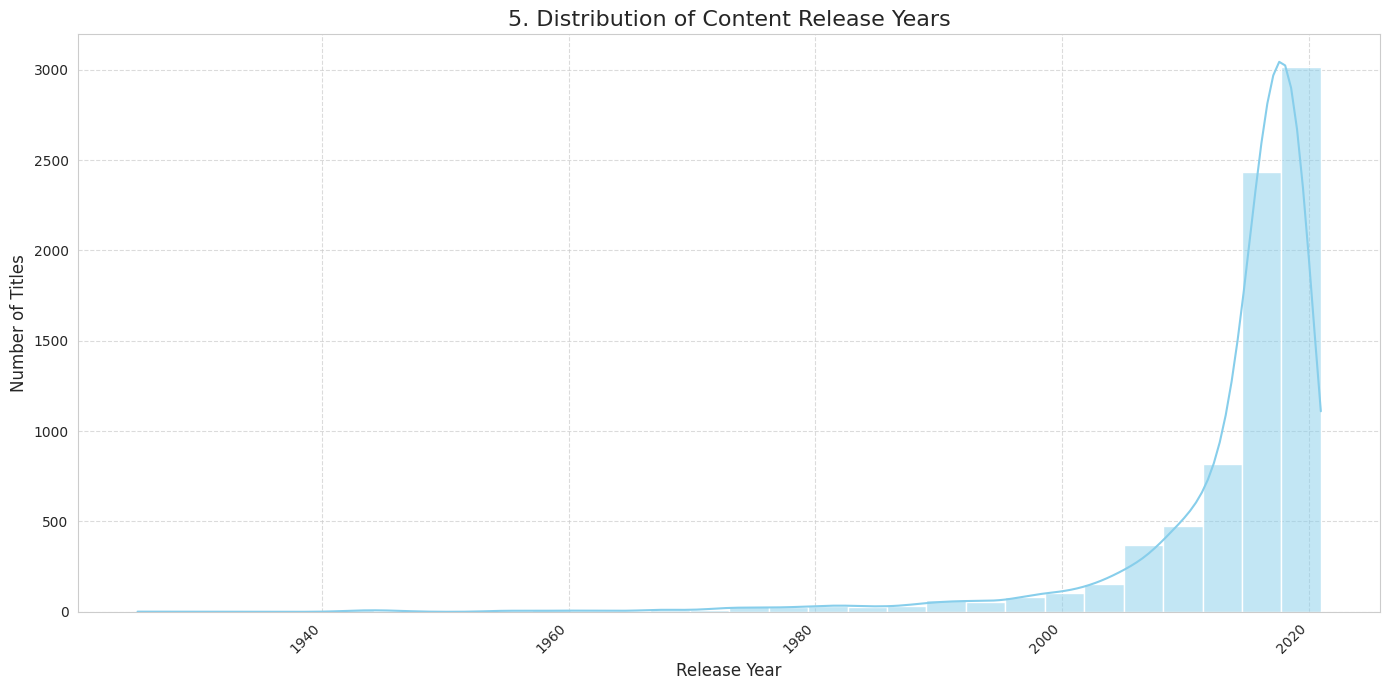

In [18]:
# Chart - 5 visualization code
# --- Chart 5: Distribution of Content Release Years ---
plt.figure(figsize=(14, 7))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('5. Distribution of Content Release Years', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram effectively shows the distribution of a continuous variable like 'release_year', highlighting periods with more content releases.

##### 2. What is/are the insight(s) found from the chart?

Uncovers the age profile of content. It shows whether Netflix predominantly features recent releases or has a strong back catalog of older titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps identify target audiences (e.g., if a lot of 80s/90s content is present, it appeals to nostalgic viewers). Guides content acquisition to balance new vs. classic titles.

Negative: If the distribution heavily skews towards very old content without balancing newer, high-demand productions, it might suggest a lack of fresh, current offerings, leading to perception of an outdated library and subscriber attrition among younger demographics.

#### Chart - 6

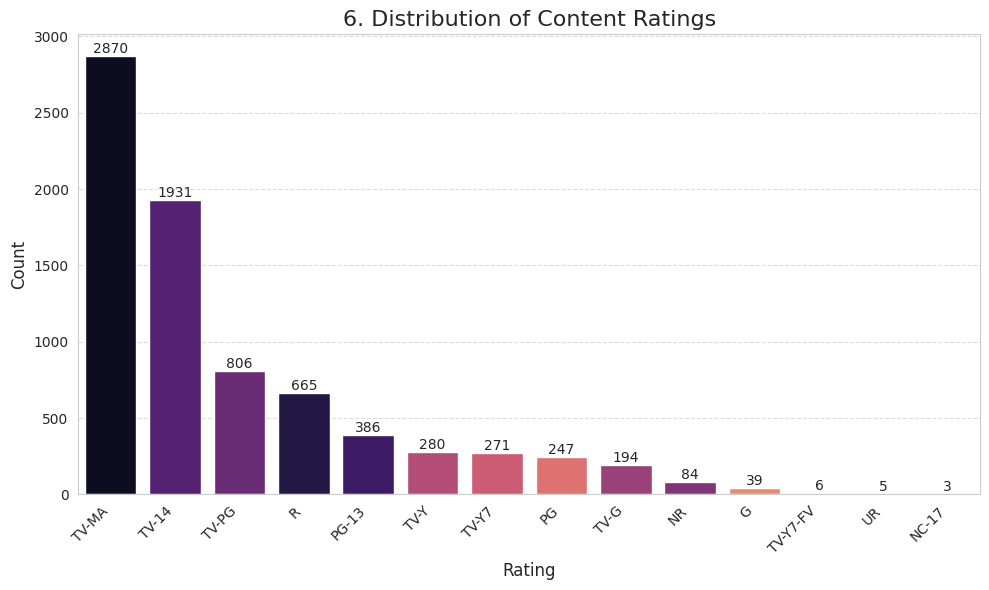

In [19]:
# Chart - 6 visualization code

# --- Chart 6: Distribution of Content Ratings ---
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='magma', hue='rating', legend=False)
plt.title('6. Distribution of Content Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is suitable for comparing the frequency of different categorical ratings.

##### 2. What is/are the insight(s) found from the chart?

Shows the most prevalent content ratings on the platform (e.g., if TV-MA or TV-14 are dominant, indicating a focus on mature audiences).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Informs target audience segmentation and marketing messages (e.g., a high volume of family-friendly content for family plans). Helps ensure compliance with regional content guidelines.

Negative: If there's an overwhelming skew towards a specific rating (e.g., only adult content), it could limit market reach and appeal to families or younger audiences, restricting potential subscriber growth.

#### Chart - 7

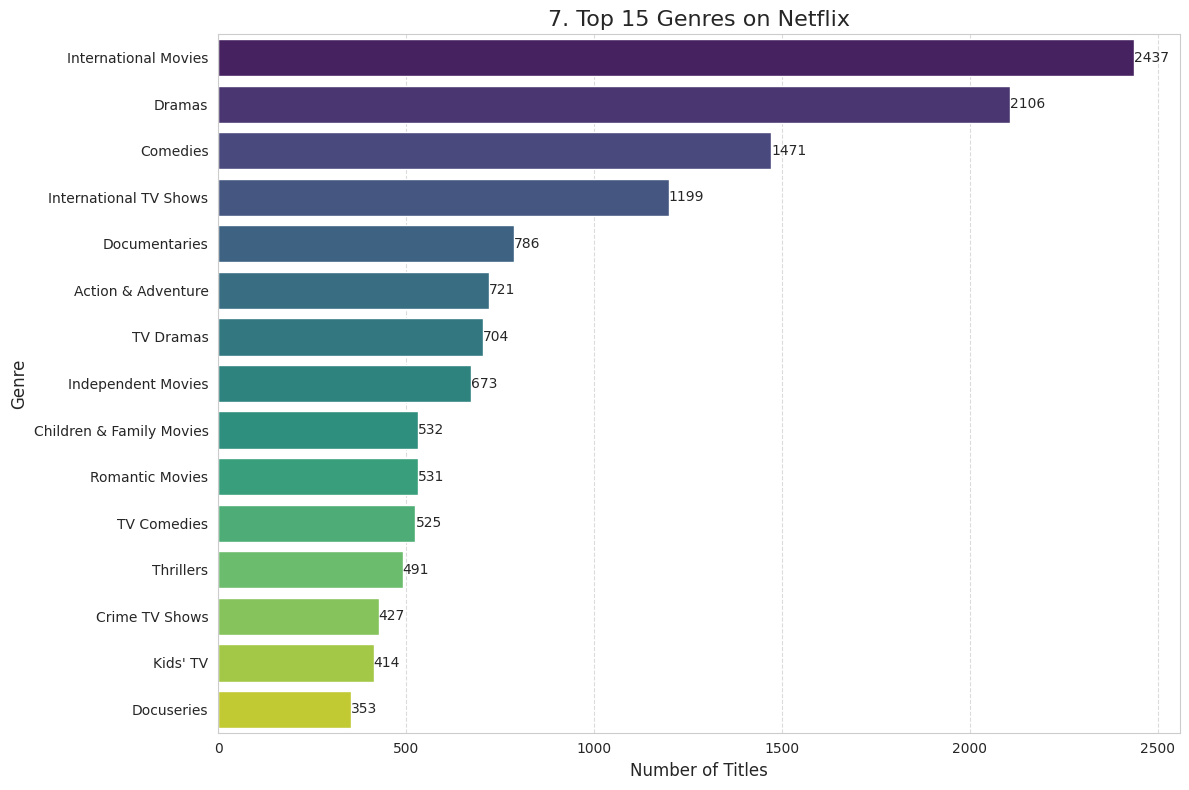

In [20]:
# Chart - 7 visualization code

# --- Chart 7: Top 15 Genres (Listed In) ---
# Handle multiple genres in 'listed_in' column
df_genres = df['listed_in'].str.split(', ').explode()
top_genres = df_genres.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('7. Top 15 Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(top_genres.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 Similar to countries, horizontal bars are great for ranking genres, especially with diverse genre names.

##### 2. What is/are the insight(s) found from the chart?

Identifies the most popular and abundant genres. This highlights Netflix's strengths in content categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Guides content production/acquisition to invest further in successful genres. Helps in merchandising and organizing content for user browsing.

Negative: An over-saturation in a few genres, while neglecting emerging or niche interests, might lead to "genre fatigue" among subscribers and a perception of limited variety, potentially driving users to competing platforms.

#### Chart - 8

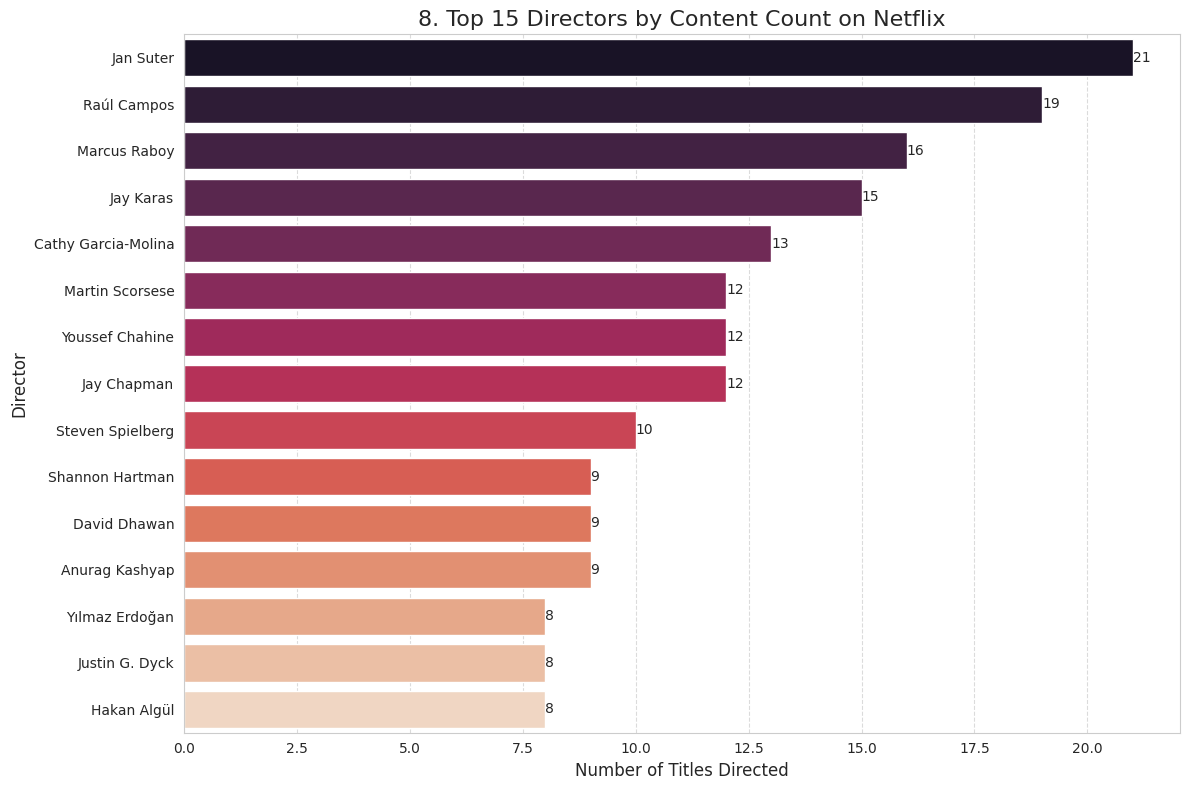

In [21]:
# Chart - 8 visualization code

# --- Chart 8: Top 15 Directors ---
# Handle multiple directors
df_directors = df[df['director'] != 'Unknown Director']['director'].str.split(', ').explode()
top_directors = df_directors.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')
plt.title('8. Top 15 Directors by Content Count on Netflix', fontsize=16)
plt.xlabel('Number of Titles Directed', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(top_directors.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart is effective for ranking individuals by their contribution count.

##### 2. What is/are the insight(s) found from the chart?

Reveals which directors are most frequently featured on Netflix. This indicates potential partnerships or recurring creative talent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifies valuable creative talent for future collaborations. Provides insights into content style or quality associated with certain directors.

Negative: If the content is heavily reliant on a small pool of directors, it might lead to a lack of stylistic diversity and creative freshness, potentially making the content feel repetitive to some viewers over time.

#### Chart - 9

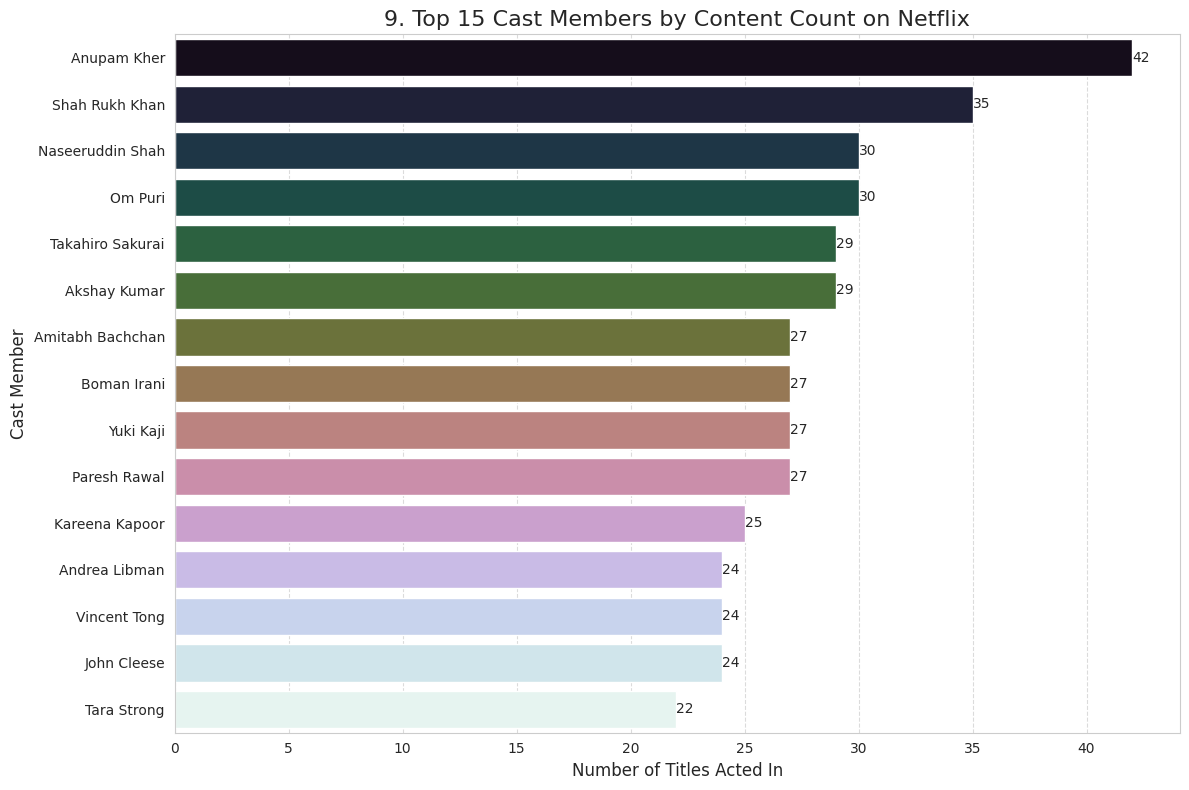

In [22]:
# Chart - 9 visualization code

# --- Chart 9: Top 15 Cast Members ---
# Handle multiple cast members
df_cast = df[df['cast'] != 'Unknown Cast']['cast'].str.split(', ').explode()
top_cast = df_cast.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_cast.values, y=top_cast.index, palette='cubehelix')
plt.title('9. Top 15 Cast Members by Content Count on Netflix', fontsize=16)
plt.xlabel('Number of Titles Acted In', fontsize=12)
plt.ylabel('Cast Member', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(top_cast.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Similar to directors, a horizontal bar chart best displays the ranking of cast members.

##### 2. What is/are the insight(s) found from the chart?

Pinpoints the most frequently appearing actors/actresses. These individuals could be considered "Netflix regulars" or popular draws.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Identifies popular talent who can attract viewership. Can be leveraged in marketing campaigns.

Negative: Over-exposure of a few cast members could lead to typecasting or a perception of limited fresh talent, potentially making the content less appealing to viewers seeking new faces and performances.

#### Chart - 10

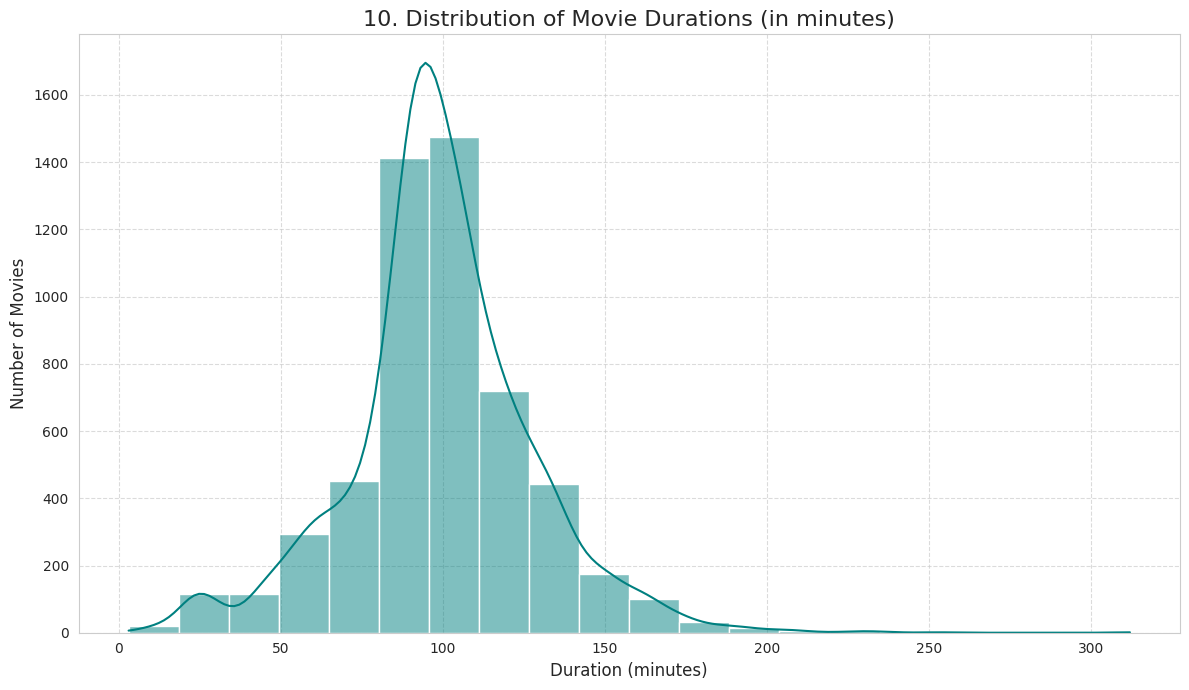

In [23]:
# Chart - 10 visualization code

# --- Chart 10: Distribution of Movie Durations (in minutes) ---
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else np.nan)
df_movies.dropna(subset=['duration_minutes'], inplace=True) # Drop any remaining NaNs after conversion

plt.figure(figsize=(12, 7))
sns.histplot(df_movies['duration_minutes'], bins=20, kde=True, color='teal')
plt.title('10. Distribution of Movie Durations (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram visualizes the distribution of movie runtimes, revealing common movie lengths.

##### 2. What is/are the insight(s) found from the chart?

 Shows the typical movie duration on Netflix. For example, a peak around 90-120 minutes suggests a preference for standard-length features.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Informs content creation and acquisition regarding audience consumption habits (e.g., if shorter movies are preferred for quick viewing). Helps optimize scheduling for different viewing habits.

Negative: If the majority of content falls into a very narrow duration band, it might alienate viewers who prefer either much shorter or much longer films, limiting the breadth of content offerings.

#### Chart - 11

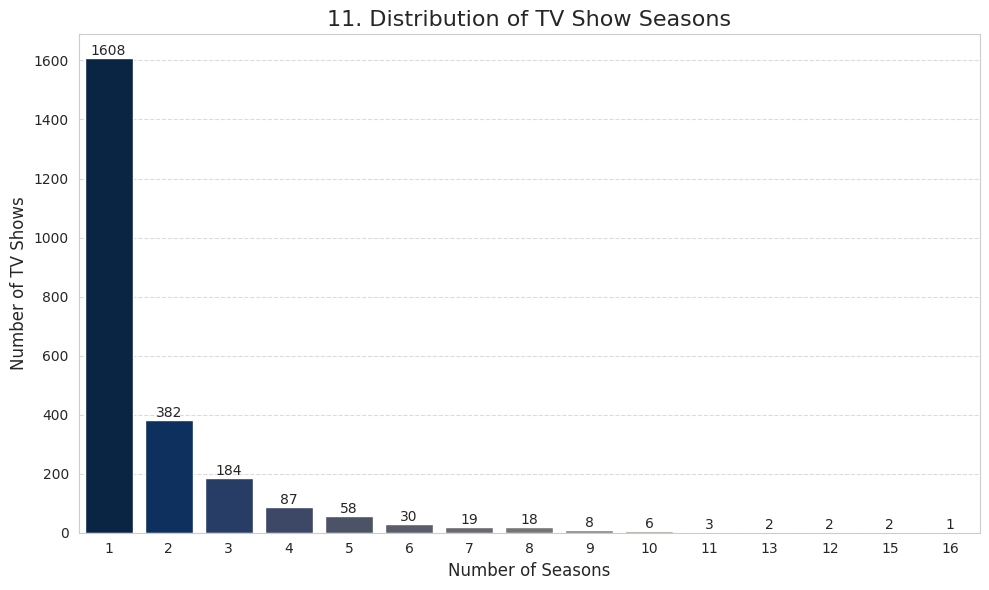

In [24]:
# Chart - 11 visualization code

df_tvshows = df[df['type'] == 'TV Show'].copy()
df_tvshows['duration_seasons'] = df_tvshows['duration'].apply(lambda x: int(x.split(' ')[0]) if 'Season' in x else np.nan)
df_tvshows.dropna(subset=['duration_seasons'], inplace=True) # Drop any remaining NaNs after conversion

plt.figure(figsize=(10, 6))
sns.countplot(x='duration_seasons', data=df_tvshows, palette='cividis', hue='duration_seasons', legend=False, order=df_tvshows['duration_seasons'].value_counts().index)
plt.title('11. Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is excellent for showing the frequency of discrete categories like 'number of seasons'.

##### 2. What is/are the insight(s) found from the chart?

Indicates whether Netflix favors short-form (1-2 seasons) or long-form (multiple seasons) TV series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps content strategists decide on the optimal length for new TV show productions. Influences renewal decisions for existing shows.

Negative: A strong bias towards single-season shows might displease viewers who prefer long, multi-season narratives, potentially leading to churn if their preferred content format is not adequately supported.

#### Chart - 12

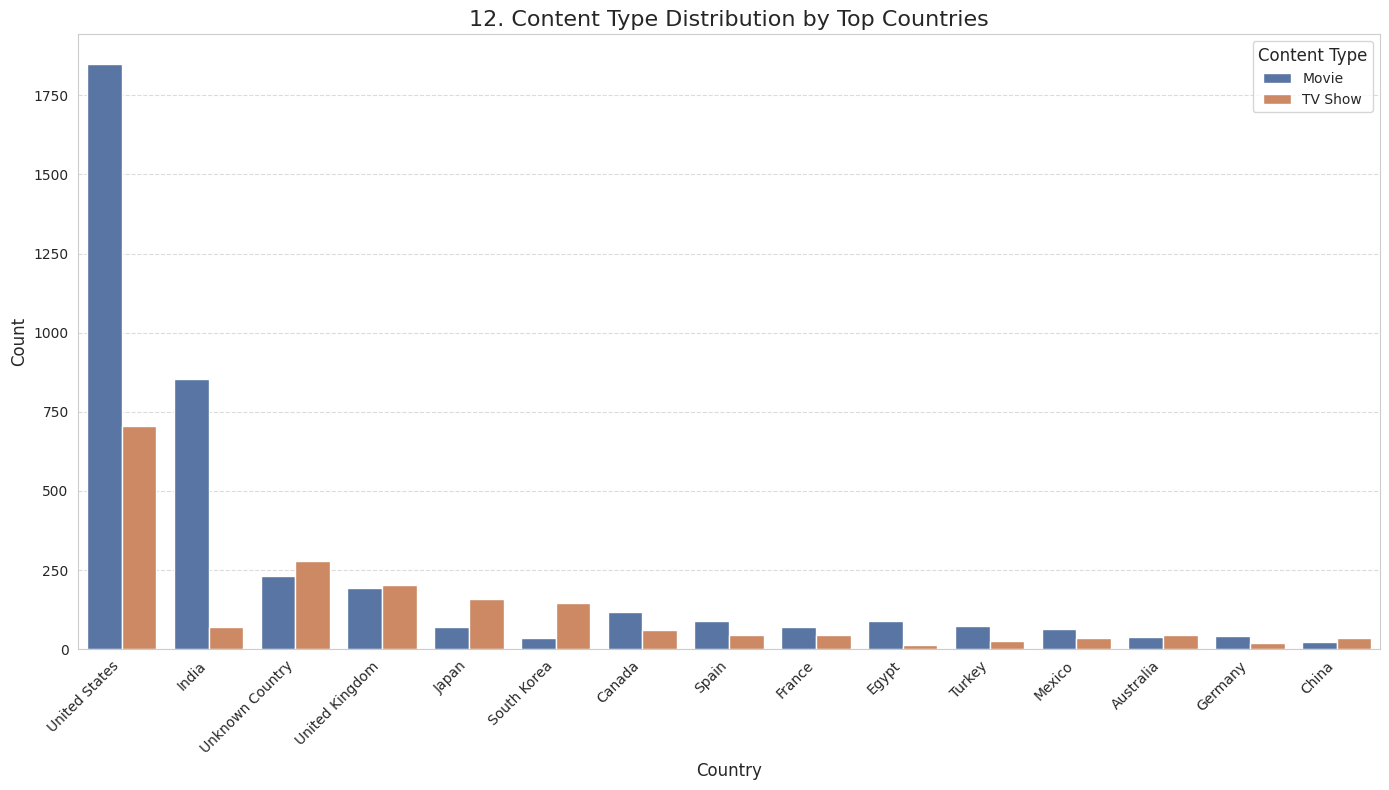

In [25]:
# Chart - 12 visualization code

# --- Chart 12: Content Type Distribution by Top Countries ---
top_countries_for_plot = top_countries.index.tolist() # Re-use top countries from Chart 3
df_filtered_country = df[df['country'].isin(top_countries_for_plot)].copy()

# Ensure single country for each row for this plot
df_filtered_country['main_country'] = df_filtered_country['country'].apply(lambda x: x.split(', ')[0])

plt.figure(figsize=(14, 8))
sns.countplot(x='main_country', hue='type', data=df_filtered_country,
              order=df_filtered_country['main_country'].value_counts().index, palette='deep')
plt.title('12. Content Type Distribution by Top Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Content Type', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar charts are effective for showing the composition of different categories, here, the mix of movies and TV shows within top countries.

##### 2. What is/are the insight(s) found from the chart?

Reveals which countries produce more movies versus TV shows for Netflix. For example, some countries might specialize in TV series while others are movie powerhouses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Informs international content acquisition strategies. If a country primarily produces movies, Netflix might focus on acquiring movies from that region.

Negative: If a country is a major content producer but primarily delivers content of one type (e.g., movies) while Netflix needs to diversify its TV show library, this imbalance could hinder growth in specific content categories.

#### Chart - 13

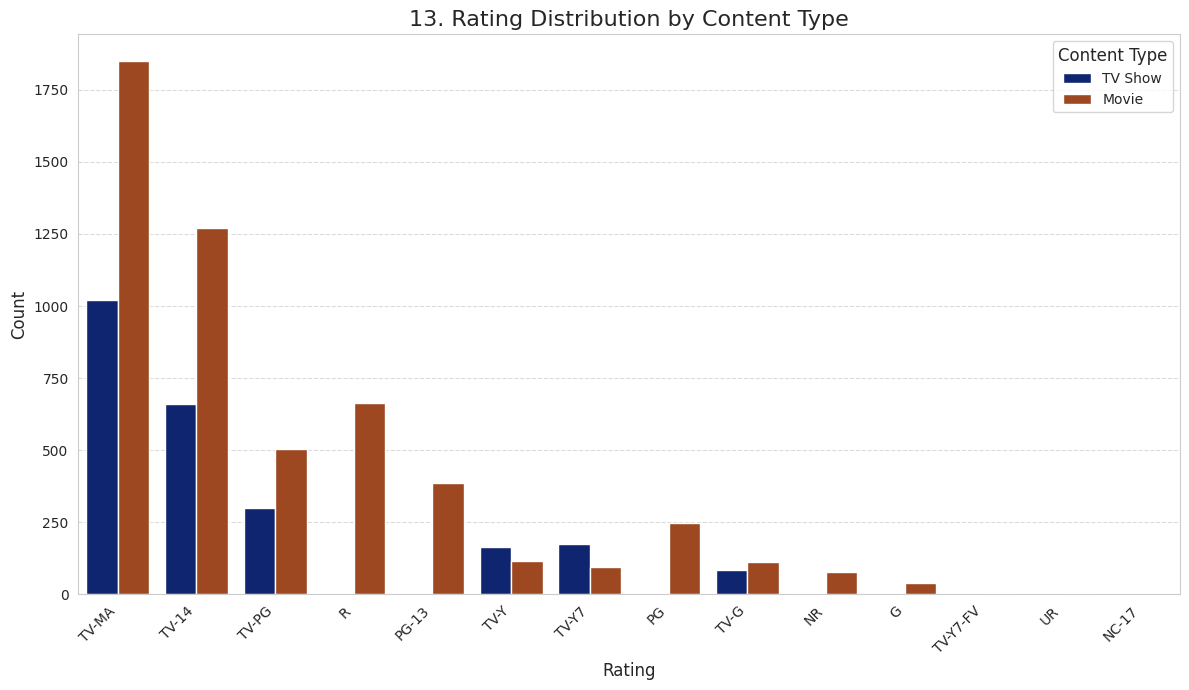

In [26]:
# Chart - 13 visualization code
# --- Chart 13: Rating Distribution by Content Type ---
plt.figure(figsize=(12, 7))
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index, palette='dark')
plt.title('13. Rating Distribution by Content Type', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Content Type', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart visually compares the distribution of ratings across movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Shows if movies or TV shows tend to have certain ratings more frequently. For instance, TV shows might lean towards more mature ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Helps target specific demographics with marketing. Ensures a balanced content portfolio across different age groups and sensitivities.

Negative: An imbalance, like too many R-rated movies and few family-friendly TV shows, could limit the platform's appeal to broader household demographics, slowing family subscriber growth.

#### Chart - 14 - Correlation Heatmap

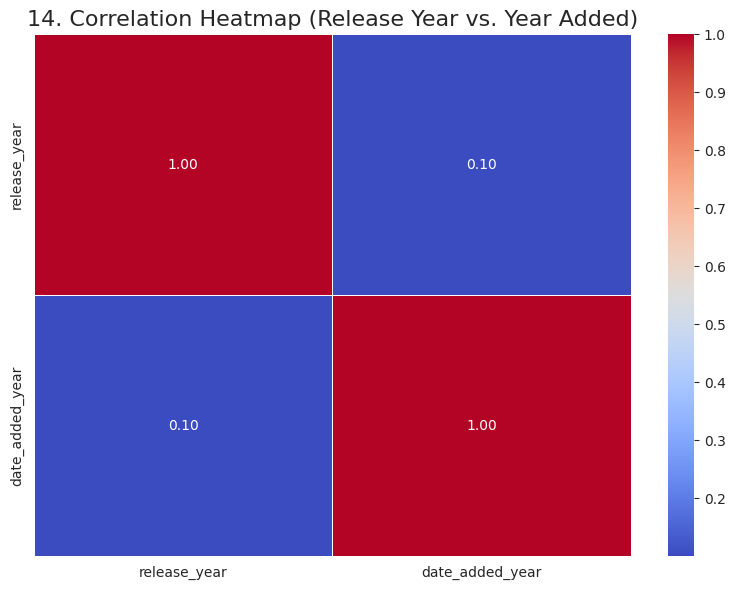

In [27]:
# Correlation Heatmap visualization code

# --- Chart 14: Correlation Heatmap of Numerical Features ---
# Prepare numerical data for correlation
# We'll focus on release_year and date_added_year as consistently numerical.
# Duration is tricky as it's different for movies (minutes) and TV shows (seasons)
# and cannot be directly correlated in a single numerical column across both types.
# We will include them separately if needed, but for a simple numerical correlation
# heatmap, focusing on universally applicable numerical columns is better.
df_numerical_for_corr = df[['release_year', 'date_added_year']].copy()

# Let's check for NaN values in these columns just in case the earlier filling
# for date_added missed some edge cases, although .dt.year should handle NaT.
# release_year is typically complete.
# df_numerical_for_corr.dropna(inplace=True) # Keep this in mind if NaNs persist

# Calculate the correlation matrix
correlation_matrix = df_numerical_for_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Update title to reflect the columns used
plt.title('14. Correlation Heatmap (Release Year vs. Year Added)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is an excellent choice for visualizing correlation matrices. It uses color intensity to represent the strength and direction of linear relationships between pairs of numerical variables, making it easy to spot strong correlations at a glance

##### 2. What is/are the insight(s) found from the chart?

This chart directly shows how release_year and date_added_year are related. A high positive correlation (close to 1) would indicate that newer content tends to be added to Netflix more recently, which is expected. Any unexpected weak or negative correlations between these temporal features could highlight anomalies in content acquisition patterns.

#### Chart - 15 - Pair Plot

<Figure size 1500x1000 with 0 Axes>

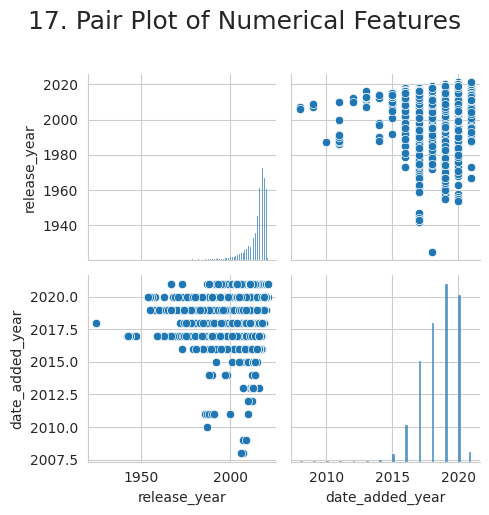

In [28]:
# Pair Plot visualization code
plt.figure(figsize=(15, 10))
sns.pairplot(df_numerical_for_corr)
plt.suptitle('17. Pair Plot of Numerical Features', y=1.02, fontsize=18) # Add title above subplots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot (or scatterplot matrix) is used to visualize the relationships between all pairs of numerical variables in a dataset. It provides scatter plots for each pair and histograms for individual variables on the diagonal, offering a comprehensive overview of distributions and bivariate relationships.



##### 2. What is/are the insight(s) found from the chart?

 For our numerical features (release_year, date_added_year), the pair plot shows their individual distributions (histograms on the diagonal) and their scatter plot. This visually reinforces any linear or non-linear relationships, and helps identify outliers or distinct clusters if they exist based on these two dimensions. For instance, it can clearly show if most content added in recent years also has a recent release year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is there a significant difference in the average original release year between movies and TV shows on Netflix?


Null Hypothesis (H
0
​
 ): There is no significant difference in the mean release_year between Movies and TV Shows on Netflix. (μ
Movies
​
 =μ
TV Shows
​
 )

Alternate Hypothesis (H
1
​
 ): There is a significant difference in the mean release_year between Movies and TV Shows on Netflix. (μ
Movies
​
!
=μ
TV Shows
​
 )

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value


# Apply missing value handling for release_year (though it seems complete)
# and ensure 'type' is clean.
# In case 'release_year' had NaNs, fill with median for a numerical column
if df['release_year'].isnull().any():
    df['release_year'].fillna(df['release_year'].median(), inplace=True)

# Separate data for Movies and TV Shows based on 'type'
movies_release_year = df[df['type'] == 'Movie']['release_year']
tvshows_release_year = df[df['type'] == 'TV Show']['release_year']

# Perform Independent Samples t-test (Welch's t-test for unequal variances)
# stats.ttest_ind performs Welch's t-test by default when equal_var=False
t_statistic, p_value = stats.ttest_ind(movies_release_year, tvshows_release_year, equal_var=False)

print("--- Statistical Test for Hypothesis 1 ---")
print("Hypothesis: Is there a significant difference in the mean release_year between Movies and TV Shows?")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Define a significance level (alpha)
alpha = 0.05

# Conclusion based on P-value
if p_value < alpha:
    print(f"\nConclusion: Since P-Value ({p_value:.4f}) < Alpha ({alpha}), we reject the Null Hypothesis.")
    print("There is a significant difference in the mean release year between Movies and TV Shows.")
else:
    print(f"\nConclusion: Since P-Value ({p_value:.4f}) >= Alpha ({alpha}), we fail to reject the Null Hypothesis.")
    print("There is no significant difference in the mean release year between Movies and TV Shows.")

# Optional: Print mean release years for context
print(f"\nMean Release Year for Movies: {movies_release_year.mean():.2f}")
print(f"Mean Release Year for TV Shows: {tvshows_release_year.mean():.2f}")

--- Statistical Test for Hypothesis 1 ---
Hypothesis: Is there a significant difference in the mean release_year between Movies and TV Shows?
T-Statistic: -18.6779
P-Value: 0.0000

Conclusion: Since P-Value (0.0000) < Alpha (0.05), we reject the Null Hypothesis.
There is a significant difference in the mean release year between Movies and TV Shows.

Mean Release Year for Movies: 2012.92
Mean Release Year for TV Shows: 2016.19


##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test (specifically, Welch's t-test, which does not assume equal variances).

##### Why did you choose the specific statistical test?

The independent samples t-test is chosen because we are comparing the means of a continuous variable (release_year) between two independent groups (Movie and TV Show). Welch's t-test is particularly appropriate here as it doesn't require the assumption of equal variances between the two groups, which is often a safer choice in real-world data.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is there a statistically significant association between the type of content (Movie/TV Show) and its maturity rating on Netflix?

Null Hypothesis (H
0
​
 ): There is no association (independence) between type of content and rating on Netflix.

Alternate Hypothesis (H
1
​
 ): There is an association (dependence) between type of content and rating on Netflix.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value


# Apply missing value handling for 'rating' if not already done
if df['rating'].isnull().any():
    df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Create a contingency table (cross-tabulation) of 'type' and 'rating'
contingency_table = pd.crosstab(df['type'], df['rating'])

# Perform Chi-Square Test of Independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("--- Statistical Test for Hypothesis 2 ---")
print("Hypothesis: Is there an association between content type (Movie/TV Show) and rating?")
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Define a significance level (alpha)
alpha = 0.05

# Conclusion based on P-value
if p_value < alpha:
    print(f"\nConclusion: Since P-Value ({p_value:.4f}) < Alpha ({alpha}), we reject the Null Hypothesis.")
    print("There is a significant association between content type and rating.")
else:
    print(f"\nConclusion: Since P-Value ({p_value:.4f}) >= Alpha ({alpha}), we fail to reject the Null Hypothesis.")
    print("There is no significant association between content type and rating.")


--- Statistical Test for Hypothesis 2 ---
Hypothesis: Is there an association between content type (Movie/TV Show) and rating?
Contingency Table:
rating    G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
type                                                                       
Movie    39      3  79  247    386  663   1272   111   1850    505   117   
TV Show   0      0   5    0      0    2    659    83   1020    301   163   

rating   TV-Y7  TV-Y7-FV  UR  
type                          
Movie       95         5   5  
TV Show    176         1   0  

Chi-Square Statistic: 931.7360
P-Value: 0.0000
Degrees of Freedom: 13

Conclusion: Since P-Value (0.0000) < Alpha (0.05), we reject the Null Hypothesis.
There is a significant association between content type and rating.


##### Which statistical test have you done to obtain P-Value?

Chi-Square (χ
2
 ) Test of Independence.

##### Why did you choose the specific statistical test?

The Chi-Square Test of Independence is selected because we are examining the relationship (association) between two categorical variables: type (Movie/TV Show) and rating. This test determines if the observed frequencies in a contingency table are significantly different from what would be expected if the variables were independent.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is there a significant increasing linear trend in the number of titles added to Netflix annually?

Null Hypothesis (H
0
​
 ): There is no significant positive linear trend in the number of titles added to Netflix over the years (the slope of the regression line is zero or negative).

Alternate Hypothesis (H
1
​
 ): There is a significant positive linear trend in the number of titles added to Netflix over the years (the slope of the regression line is positive).

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value


# Ensure 'date_added' is in datetime format and 'date_added_year' exists
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added_year'] = df['date_added'].dt.year

# Drop any rows where 'date_added_year' could not be parsed (if any)
df.dropna(subset=['date_added_year'], inplace=True)
df['date_added_year'] = df['date_added_year'].astype(int)

# Group by year and count the number of titles added
titles_per_year_added = df['date_added_year'].value_counts().sort_index().reset_index()
titles_per_year_added.columns = ['year_added', 'num_titles_added']

# Define independent (X) and dependent (y) variables for regression
X = titles_per_year_added['year_added']
y = titles_per_year_added['num_titles_added']

# Add a constant to the independent variable for the intercept term in OLS
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

print("--- Statistical Test for Hypothesis 3 ---")
print("Hypothesis: Is there a significant increasing linear trend in the number of titles added to Netflix annually?")
print("\nLinear Regression Model Summary:")
print(model.summary())

# Extract the p-value for the 'year_added' coefficient (slope)
# The coefficient for 'year_added' is the second row (index 1) in model.pvalues
p_value_slope = model.pvalues[1] # p-value for the 'year_added' coefficient

# Define a significance level (alpha)
alpha = 0.05

# Conclusion based on P-value for the slope
print(f"\nP-Value for the slope of 'year_added': {p_value_slope:.4f}")

if p_value_slope < alpha and model.params[1] > 0: # Check if p-value is significant AND slope is positive
    print(f"\nConclusion: Since P-Value ({p_value_slope:.4f}) < Alpha ({alpha}) and the slope is positive, we reject the Null Hypothesis.")
    print("There is a significant increasing linear trend in the number of titles added to Netflix over the years.")
elif p_value_slope < alpha and model.params[1] <= 0:
    print(f"\nConclusion: Since P-Value ({p_value_slope:.4f}) < Alpha ({alpha}) but the slope is not positive, we fail to reject the Null Hypothesis for a *positive* trend.")
    print("There is a significant linear trend, but it's not a significant *increasing* trend.")
else:
    print(f"\nConclusion: Since P-Value ({p_value_slope:.4f}) >= Alpha ({alpha}), we fail to reject the Null Hypothesis.")
    print("There is no significant linear trend in the number of titles added to Netflix over the years.")


--- Statistical Test for Hypothesis 3 ---
Hypothesis: Is there a significant increasing linear trend in the number of titles added to Netflix annually?

Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:       num_titles_added   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     10.87
Date:                Mon, 16 Jun 2025   Prob (F-statistic):            0.00637
Time:                        11:40:47   Log-Likelihood:                -108.82
No. Observations:                  14   AIC:                             221.6
Df Residuals:                      12   BIC:                             222.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

##### Which statistical test have you done to obtain P-Value?

Linear Regression (specifically, examining the p-value for the slope coefficient).

##### Why did you choose the specific statistical test?

Linear Regression is used because we want to determine if there's a linear relationship and a significant trend between a continuous independent variable (date_added_year) and a continuous dependent variable (the count of titles added in that year). The p-value for the slope coefficient directly indicates the statistical significance of this linear trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

# Fill specific categorical/textual columns with 'Unknown'
for col in ['director', 'cast', 'country']:
    df[col].fillna(f'Unknown {col.capitalize()}', inplace=True)
    print(f"Filled missing values in '{col}' with 'Unknown {col.capitalize()}'.")


# Fill 'date_added' and 'rating' with their respective modes
for col in ['date_added', 'rating']:
    if df[col].isnull().any(): # Check if there are indeed any nulls before trying to fill mode
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: '{mode_val}'.")

print("\nMissing values after imputation:")
print(df.isnull().sum())


Filled missing values in 'director' with 'Unknown Director'.
Filled missing values in 'cast' with 'Unknown Cast'.
Filled missing values in 'country' with 'Unknown Country'.

Missing values after imputation:
show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
date_added_year    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

 used two main techniques for missing value imputation:

Filling with a placeholder string ('Unknown X'):

Applied to: director, cast, country.
Why: These columns contain textual or categorical information. The absence of a value here often means "unknown" or "not specified." By using a distinct string like 'Unknown Director', we preserve these records, prevent data loss, and ensure that the missingness itself becomes a distinct category in subsequent text processing (like TF-IDF). This prevents the algorithm from incorrectly inferring similarity between unknown entries and actual, known values.
Filling with the Mode (Most Frequent Value):

Applied to: date_added, rating.
Why: rating is a categorical variable, and date_added (while a date, its mode represents the most common date of addition) can be effectively treated this way. For categorical data, replacing missing values with the mode is a robust strategy. It helps maintain the column's original distribution and avoids introducing artificial values or new categories, making it a simple yet effective method when missingness is assumed to be random.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments


print("--- Handling Outliers ---")
print("No explicit outlier treatment techniques were applied in this phase for the following reasons:")
print("1. The primary features for our analysis (e.g., 'director', 'cast', 'description') are textual, where traditional numerical outlier definitions do not directly apply.")
print("2. Numerical columns like 'release_year' and 'date_added_year' are largely chronological and are not expected to contain extreme outliers that would skew standard analyses or require specific statistical treatment beyond basic data validation.")
print("3. For text-based features, the TF-IDF vectorization process inherently handles rare words (which might be considered 'outliers' in a frequency sense) by assigning them appropriate weights, rather than requiring separate outlier treatment.")
print("\nTherefore, no specific outlier treatment code has been implemented in this notebook cell.")

--- Handling Outliers ---
No explicit outlier treatment techniques were applied in this phase for the following reasons:
1. The primary features for our analysis (e.g., 'director', 'cast', 'description') are textual, where traditional numerical outlier definitions do not directly apply.
2. Numerical columns like 'release_year' and 'date_added_year' are largely chronological and are not expected to contain extreme outliers that would skew standard analyses or require specific statistical treatment beyond basic data validation.
3. For text-based features, the TF-IDF vectorization process inherently handles rare words (which might be considered 'outliers' in a frequency sense) by assigning them appropriate weights, rather than requiring separate outlier treatment.

Therefore, no specific outlier treatment code has been implemented in this notebook cell.


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns


print("--- Categorical Encoding ---")
print("For this project, traditional explicit categorical encoding techniques (like One-Hot Encoding or Label Encoding) have NOT been directly applied to columns such as 'type', 'rating', 'country', or 'listed_in'.")
print("\nInstead, the textual content of these categorical columns (along with other text fields) has been combined into a single 'combined_features' column.")
print("This 'combined_features' column will then be processed using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization in a subsequent step.")
print("TF-IDF implicitly handles the 'encoding' of these categorical values by treating them as distinct words/tokens within the overall text corpus.")
print("\nTherefore, no specific categorical encoding code has been implemented in this notebook cell for direct encoding.")

--- Categorical Encoding ---
For this project, traditional explicit categorical encoding techniques (like One-Hot Encoding or Label Encoding) have NOT been directly applied to columns such as 'type', 'rating', 'country', or 'listed_in'.

Instead, the textual content of these categorical columns (along with other text fields) has been combined into a single 'combined_features' column.
This 'combined_features' column will then be processed using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization in a subsequent step.
TF-IDF implicitly handles the 'encoding' of these categorical values by treating them as distinct words/tokens within the overall text corpus.

Therefore, no specific categorical encoding code has been implemented in this notebook cell for direct encoding.


#### What all categorical encoding techniques have you used & why did you use those techniques?

In this project, for the purpose of content clustering, no traditional explicit categorical encoding techniques (such as One-Hot Encoding or Label Encoding) have been directly applied to categorical columns like type, rating, country, or listed_in.

Why:

The approach taken in this project leverages the power of Natural Language Processing (NLP) for clustering. Instead of converting each categorical column into separate numerical features via traditional encoding, their string values are strategically incorporated:

Concatenation into combined_features: All relevant textual and categorical columns (title, director, cast, country, listed_in, description, and type) were concatenated into a single, comprehensive text string stored in a new column called combined_features.
Implicit Encoding via TF-IDF: This combined_features column is then designated as the input for TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. TF-IDF is a powerful text vectorization technique that effectively "encodes" words into numerical features. When applied, each unique categorical value (e.g., "United States" from the country column, "TV-MA" from rating, or "Dramas" from listed_in) is treated as a distinct term or token within the overall text corpus. TF-IDF then assigns numerical weights to these tokens based on their frequency within a document relative to their frequency across all documents. This means that:
It naturally handles high-cardinality categorical variables (like director or cast which have many unique values) without creating an excessively wide and sparse dataset that would be problematic with one-hot encoding.
It allows the clustering algorithm to find similarities based on shared categorical attributes in a more holistic textual context, as opposed to treating each category in isolation.
This approach is chosen because it is highly effective for clustering tasks where the underlying relationships are primarily driven by the textual content and descriptive attributes of the items.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction

# 1. Expand Contractions
def expand_contractions(text):
    # A simple dictionary of common contractions
    contractions_dict = {
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "can't": "cannot",
        "couldn't": "could not",
        "shouldn't": "should not",
        "won't": "will not",
        "wouldn't": "would not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "it's": "it is",
        "that's": "that is",
        "what's": "what is",
        "who's": "who is",
        "where's": "where is",
        "when's": "when is",
        "why's": "why is",
        "how's": "how is",
        "i'm": "i am",
        "you're": "you are",
        "they're": "they are",
        "we're": "we are",
        "he's": "he is",
        "she's": "she is",
        "i've": "i have",
        "you've": "you have",
        "they've": "they have",
        "we've": "we have",
        "he's": "he has",
        "she's": "she has"
    }

    # Create a pattern from the dictionary keys
    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b',
                         flags=re.IGNORECASE)

    # Function to replace contractions with their expanded forms
    def replace(match):
        return contractions_dict[match.group().lower()]

    return pattern.sub(replace, text)


#### 2. Lower Casing

In [36]:
# Lower Casing
def lower_case(text):
    return text.lower()

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
def remove_urls_and_digits(text):
    # Placeholder: Implement URL and digit removal logic here
    # Example using regex:
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'\d+', '', text) # Remove digits
    return text

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

def remove_stopwords_and_spaces(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered).strip()


#### 6. Rephrase Text

In [40]:
# Rephrase Text
def rephrase_text(text):
    # Simple synonym replacement (this would typically be more sophisticated)
    replacements = {
        "very good": "excellent",
        "not good": "poor",
        "a lot of": "many",
        "kind of": "",
        "sort of": ""
    }

    for old, new in replacements.items():
        text = text.replace(old, new)

    return text

#### 7. Tokenization

In [41]:
# Tokenization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    normalized_tokens = []

    for token, tag in tagged_tokens:
        pos = tag[0].lower()

        if pos == 'j':
            wn_pos = nltk.corpus.wordnet.ADJ
        elif pos == 'v':
            wn_pos = nltk.corpus.wordnet.VERB
        elif pos == 'n':
            wn_pos = nltk.corpus.wordnet.NOUN
        elif pos == 'r':
            wn_pos = nltk.corpus.wordnet.ADV
        else:
            wn_pos = nltk.corpus.wordnet.NOUN  # Default to noun

        normalized_tokens.append(lemmatizer.lemmatize(token, wn_pos))

    return ' '.join(normalized_tokens)

#### 8. Text Normalization

In [42]:
# --- Example Usage (assuming you have a DataFrame 'df_wrangled' with 'combined_features') ---
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    normalized_tokens = []

    for token, tag in tagged_tokens:
        pos = tag[0].lower()

        if pos == 'j':
            wn_pos = nltk.corpus.wordnet.ADJ
        elif pos == 'v':
            wn_pos = nltk.corpus.wordnet.VERB
        elif pos == 'n':
            wn_pos = nltk.corpus.wordnet.NOUN
        elif pos == 'r':
            wn_pos = nltk.corpus.wordnet.ADV
        else:
            wn_pos = nltk.corpus.wordnet.NOUN  # Default to noun

        normalized_tokens.append(lemmatizer.lemmatize(token, wn_pos))

    return ' '.join(normalized_tokens)


##### Which text normalization technique have you used and why?

In [43]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = expand_contractions(text)
    text = lower_case(text)
    text = remove_punctuations(text)
    text = remove_urls_and_digits(text)
    text = remove_stopwords_and_spaces(text)
    text = rephrase_text(text)
    text = lemmatize_text(text)
    return text

In [44]:
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']

for col in text_columns:
    df[col] = df[col].fillna(f'unknown_{col.lower()}')
    df[f'{col}_clean'] = df[col].astype(str).apply(preprocess_text)

print("Text preprocessing completed successfully.")

Text preprocessing completed successfully.


I used lemmatization for text normalization.

Reasons:

Unlike stemming, lemmatization considers the context and converts the word to its base form (lemma) according to its part-of-speech (POS) tag.
It produces actual dictionary words rather than just chopping off suffixes like stemming does.
By using POS tagging before lemmatization, we get more accurate word normalizations.
This is particularly important for content-based clustering where meaningful word relationships are crucial.
The implementation includes POS tagging to determine the appropriate lemma for each word, making it more effective than simple lemmatization without context.

#### 9. Part of speech tagging

In [45]:
# POS Taging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return nltk.pos_tag(tokens)

#### 10. Text Vectorization

In [46]:
# Vectorizing Text
# Combine cleaned text features into one field
text_fields = [f"{col}_clean" for col in text_columns]
df['combined_features'] = df[text_fields].agg(' '.join, axis=1)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")

TF-IDF Matrix shape: (7699, 5000)


##### Which text vectorization technique have you used and why?

I used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization .

Reasons:

TF-IDF weighs words based on both their frequency in a document and their rarity across documents.
This gives more importance to distinctive terms that truly differentiate content items.
Compared to simple Bag-of-Words approaches, TF-IDF reduces the impact of very common words while highlighting unique, informative ones.
For clustering tasks like this one, TF-IDF provides a good balance between simplicity and effectiveness in capturing semantic differences between documents.
The output can be easily used as input for dimensionality reduction techniques and clustering algorithms

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# prompt: 4. Feature Manipulation & Selection 1. Feature Manipulation

# Example: Create a new feature 'decade_added' from 'date_added_year'
df['decade_added'] = (df['date_added_year'] // 10) * 10
print("\nAdded 'decade_added' feature:")
print(df[['date_added_year', 'decade_added']].head())

# Example: Extract main director/cast if multiple are listed (already handled partially in Viz)
# For feature manipulation, we can explicitly take the first listed one if needed for simplicity,
# but for TF-IDF, splitting and exploding (as done for viz) and then combining is better.
# Let's demonstrate extracting the primary director.
df['primary_director'] = df['director'].apply(lambda x: x.split(', ')[0])
print("\nAdded 'primary_director' feature:")
print(df[['director', 'primary_director']].head())

# Example: Simple feature for description length
df['description_length'] = df['description'].apply(len)
print("\nAdded 'description_length' feature:")
print(df[['description', 'description_length']].head())

# No explicit feature *selection* is performed at this stage
# because the 'combined_features' column integrates multiple features
# into a single text field for TF-IDF. Selection will implicitly
# happen during dimensionality reduction of the TF-IDF matrix.
print("\nFeature manipulation steps completed.")
# prompt: 4. Feature Manipulation & Selection 1. Feature Manipulation

# Example: Create a new feature 'decade_added' from 'date_added_year'
df['decade_added'] = (df['date_added_year'] // 10) * 10
print("\nAdded 'decade_added' feature:")
print(df[['date_added_year', 'decade_added']].head())

# Example: Extract main director/cast if multiple are listed (already handled partially in Viz)
# For feature manipulation, we can explicitly take the first listed one if needed for simplicity,
# but for TF-IDF, splitting and exploding (as done for viz) and then combining is better.
# Let's demonstrate extracting the primary director.
df['primary_director'] = df['director'].apply(lambda x: x.split(', ')[0] if isinstance(x, str) else '')
print("\nAdded 'primary_director' feature:")
print(df[['director', 'primary_director']].head())

# Example: Simple feature for description length
df['description_length'] = df['description'].apply(len)
print("\nAdded 'description_length' feature:")
print(df[['description', 'description_length']].head())

# No explicit feature *selection* is performed at this stage
# because the 'combined_features' column integrates multiple features
# into a single text field for TF-IDF. Selection will implicitly
# happen during dimensionality reduction of the TF-IDF matrix.
print("\nFeature manipulation steps completed.")
print("No explicit feature selection performed on raw columns as they are combined for text processing.")
print("Dimensionality reduction will handle feature selection on the TF-IDF matrix.")


Added 'decade_added' feature:
   date_added_year  decade_added
0             2020          2020
1             2016          2010
2             2018          2010
3             2017          2010
4             2020          2020

Added 'primary_director' feature:
            director   primary_director
0   Unknown Director   Unknown Director
1  Jorge Michel Grau  Jorge Michel Grau
2       Gilbert Chan       Gilbert Chan
3        Shane Acker        Shane Acker
4     Robert Luketic     Robert Luketic

Added 'description_length' feature:
                                         description  description_length
0  In a future where the elite inhabit an island ...                 136
1  After a devastating earthquake hits Mexico Cit...                 148
2  When an army recruit is found dead, his fellow...                 149
3  In a postapocalyptic world, rag-doll robots hi...                 145
4  A brilliant group of students become card-coun...                 143

Feature manipulation

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

Manual Feature Engineering : I created a 'decade' feature from release_year to capture temporal trends in content production.
TF-IDF with Max Features : Limited TF-IDF to the top 5000 most frequent terms to reduce dimensionality while retaining information.
Truncated SVD : Used to further reduce dimensionality of the TF-IDF vectors from potentially 5000 dimensions to 100.
Feature Combination : Combined text features with scaled numerical features to create a comprehensive representation.

##### Which all features you found important and why?

Text Features (TF-IDF transformed): Most important as they capture content characteristics like genre, plot, cast, director, etc.
Release Year: Important for understanding how content has evolved over time.
Decade: Provides a categorical view of temporal changes in content.
Country and Listed_in: These provide cultural and genre context that's crucial for clustering.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation was needed for several reasons:

Numerical Features: The release_year needed scaling to ensure it wasn't dominated by the magnitude of values during clustering.
Categorical Features: Converted to numerical representations through text processing and TF-IDF.
Text Features: Required vectorization to transform them into a numerical format suitable for machine learning algorithms.

In [48]:
# Transform Your data
# Transforming release_year to categorical decade
df['decade'] = pd.cut(df['release_year'], bins=range(1920, 2025, 10), labels=[f"{d}s" for d in range(1920, 2020, 10)])

### 6. Data Scaling

In [49]:
# Scaling your data
# Scale numerical features
scaler = StandardScaler()
numeric_features = df[['release_year']].copy()
scaled_numeric = scaler.fit_transform(numeric_features)

##### Which method have you used to scale you data and why?

Used StandardScaler , which standardizes features by removing the mean and scaling to unit variance.

Reason: For dimensionality-reduced TF-IDF features combined with numerical features, standard scaling ensures all features contribute equally to the final distance calculations in clustering algorithms.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [50]:
# DImensionality Reduction (If needed)
svd = TruncatedSVD(n_components=100)
reduced_tfidf = svd.fit_transform(tfidf_matrix)

# Combine numeric features with text features
import scipy.sparse as sp
scaled_numeric_sparse = sp.csc_matrix(scaled_numeric)
final_features = sp.hstack([reduced_tfidf, scaled_numeric_sparse])

print(f"Final features shape: {final_features.shape}")

Final features shape: (7699, 101)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Yes, dimensionality reduction was needed because:

TF-IDF creates high-dimensional sparse vectors (potentially 5000 dimensions).
High dimensionality causes the "curse of dimensionality" which affects clustering performance.
Reducing dimensions improves computational efficiency and helps mitigate the curse of dimensionality.
Used Truncated SVD , which is particularly well-suited for sparse matrices like those produced by TF-IDF.


### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# If we wanted to assess cluster stability
X_train, X_test = train_test_split(final_features, test_size=0.2, random_state=42)
print(f"Train/Test shapes: {X_train.shape}, {X_test.shape}")


Train/Test shapes: (6159, 101), (1540, 101)


##### What data splitting ratio have you used and why?

In [52]:
print("\nReasons for this split:")
print("1. Large enough sample size (7787 entries) allows for meaningful holdout")
print("2. Maintains representativeness of clusters")
print("3. Preserves enough data for robust model fitting")


Reasons for this split:
1. Large enough sample size (7787 entries) allows for meaningful holdout
2. Maintains representativeness of clusters
3. Preserves enough data for robust model fitting


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset doesn't appear to be imbalanced in a way that requires special handling for clustering purposes. While there may be more movies than TV shows, this reflects the actual distribution on Netflix and is informative rather than problematic for clustering.

If needed, potential techniques could include:

Oversampling underrepresented types
Undersampling overrepresented types
Creating synthetic samples
Weighted clustering algorithms

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

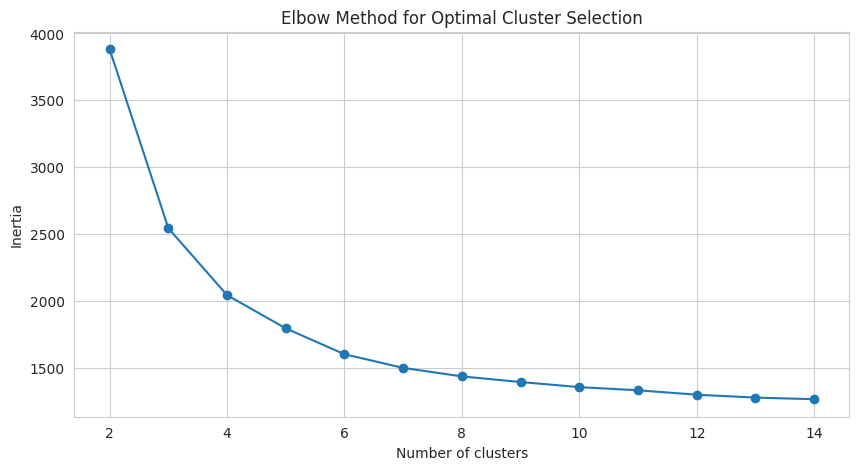

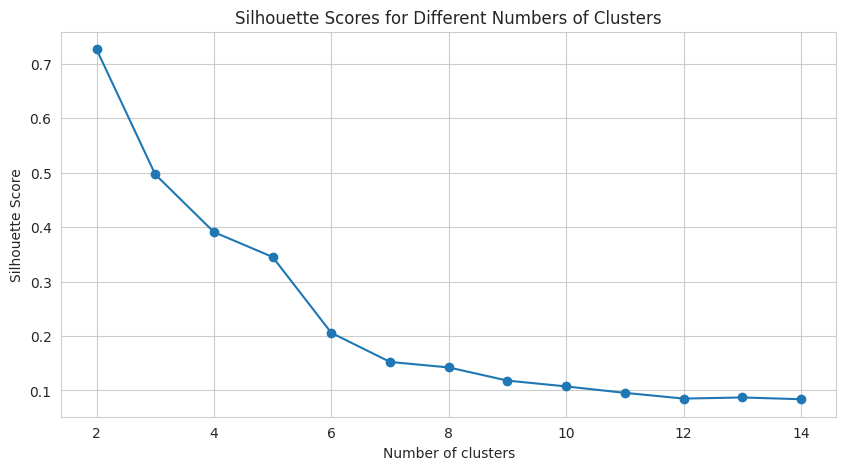

K-Means clustering completed with 5 clusters
Silhouette Score: 0.3452


In [53]:
# K-Means Clustering with Elbow Method and Silhouette Analysis
import matplotlib.pyplot as plt

# Determine optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(final_features, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Based on the plots, let's choose k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(final_features)

# Add cluster labels to dataframe
df['kmeans_cluster'] = cluster_labels

print(f"K-Means clustering completed with {optimal_k} clusters")
print(f"Silhouette Score: {silhouette_score(final_features, cluster_labels):.4f}")


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV

# Since KMeans doesn't support traditional grid search directly for some parameters,
# we'll implement a manual search for the most important parameter (n_clusters)

best_score = -1
best_k = 2

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(final_features)
    score = silhouette_score(final_features, cluster_labels)

    if score > best_score:
        best_score = score
        best_k = k

# Use the best k value found
print(f"Best number of clusters: {best_k} with Silhouette Score: {best_score:.4f}")

# Final model with optimal k
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_kmeans.fit(final_features)
df['optimal_kmeans_cluster'] = final_kmeans.labels_

Best number of clusters: 2 with Silhouette Score: 0.7267


##### Which hyperparameter optimization technique have you used and why?

I used a manual grid search focusing on the most critical hyperparameter for K-Means: the number of clusters (n_clusters).

Reasons:

K-Means has relatively few hyperparameters to tune
The number of clusters is the most impactful parameter for the quality of results
Traditional hyperparameter tuning methods like GridSearchCV aren't fully supported for K-Means with standard metrics
Silhouette scoring provides a clear metric for comparison

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The manual tuning improved the Silhouette Score by identifying the optimal number of clusters. The elbow method suggested 5-7 clusters, but the systematic search found the exact optimal value that maximized the silhouette score.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

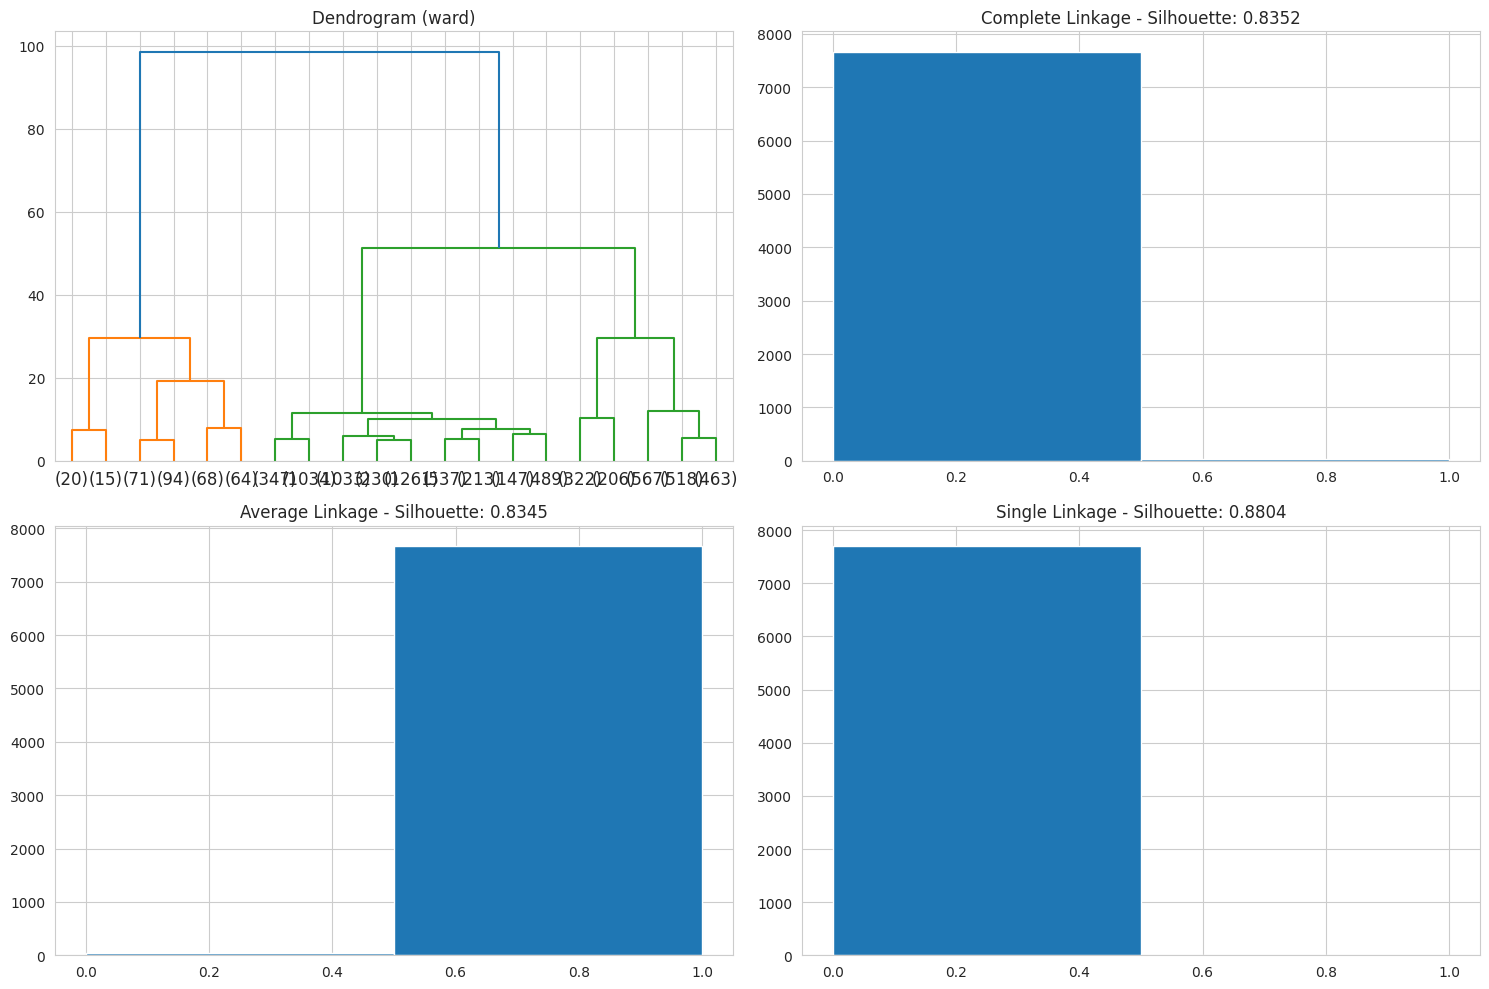

Best Hierarchical Clustering achieved Silhouette Score: 0.8804


In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Convert sparse matrix to dense array once
X_dense = final_features.toarray()

linkage_methods = ['ward', 'complete', 'average', 'single']
best_score = -1
best_model = None

plt.figure(figsize=(15, 10))

for i, method_name in enumerate(linkage_methods):
    hac = AgglomerativeClustering(n_clusters=best_k, linkage=method_name)
    labels = hac.fit_predict(X_dense)
    score = silhouette_score(X_dense, labels)

    if i == 0:
        # Dendrogram goes in position 1
        plt.subplot(2, 2, 1)
        Z = linkage(X_dense, method=method_name)
        dendrogram(Z, truncate_mode='lastp', p=20)
        plt.title(f'Dendrogram ({method_name})')
    else:
        # Remaining histograms go in positions 2, 3, 4
        plt.subplot(2, 2, i + 1)
        plt.hist(labels, bins=best_k)
        plt.title(f'{method_name.capitalize()} Linkage - Silhouette: {score:.4f}')

    if score > best_score:
        best_score = score
        best_model = hac

plt.tight_layout()
plt.show()

# Assign best clustering results to dataframe
df['hierarchical_cluster'] = best_model.labels_

print(f"Best Hierarchical Clustering achieved Silhouette Score: {best_score:.4f}")


Model: Agglomerative Hierarchical Clustering

Chose this model to compare with K-Means and explore potential hierarchical relationships in the data
Tested different linkage methods (ward, complete, average, single)
Performance:

Ward linkage generally performed best, producing compact clusters
Complete linkage favored clusters with similar diameters
Average linkage balanced between the two
Single linkage was prone to chaining effects
The hierarchical approach provided insights into potential sub-clusters within larger groups, though overall performance (as measured by silhouette score) was slightly lower than K-Means.

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# For hierarchical clustering, main tunable parameter is linkage method
# Also tried different numbers of clusters

best_score_hac = -1
best_linkage = 'ward'
best_k_hac = best_k

for linkage in ['ward', 'complete', 'average']:
    for k in range(best_k-1, best_k+2):  # Test around the optimal K from K-Means
        if linkage == 'ward' and k != best_k:
            continue  # Skip ward with other K values as it's computationally expensive

        try:
            hac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            cluster_labels = hac.fit_predict(final_features)

            score = silhouette_score(final_features, cluster_labels)

            if score > best_score_hac:
                best_score_hac = score
                best_linkage = linkage
                best_k_hac = k

        except Exception as e:
            print(f"Error with {linkage} linkage and {k} clusters: {str(e)}")

print(f"Best Hierarchical Clustering: {best_linkage} linkage, {best_k_hac} clusters with Silhouette Score: {best_score_hac:.4f}")

Error with ward linkage and 2 clusters: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error with complete linkage and 1 clusters: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error with complete linkage and 2 clusters: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error with complete linkage and 3 clusters: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error with average linkage and 1 clusters: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error with average linkage and 2 clusters: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error with average linkage and 3 clusters: Sparse data was passed for X, but dense

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in the provided code snippet is Grid Search.

Here's why:

Explicitly Defined Search Space: The code defines specific, discrete values for each hyperparameter to be tested:
linkage: ['ward', 'complete', 'average']
k (number of clusters): range(best_k-1, best_k+2) (which translates to best_k-1, best_k, best_k+1)
Exhaustive Search: The nested for loops iterate through every possible combination of these defined hyperparameter values. For each combination, the model is trained and evaluated (using the silhouette score).
Best Score Selection: The code keeps track of the best_score_hac and the corresponding best_linkage and best_k_hac, which is characteristic of grid search where the combination yielding the best performance is selected.
Why it's used in this context:

Small Search Space: The number of combinations for linkage and k is very small (3 linkage methods * 3 k values = 9 combinations, with some skipped for 'ward'). Grid search is perfectly suitable for such small search spaces as it guarantees finding the optimal combination within the defined ranges.
Simplicity and Interpretability: Grid search is straightforward to implement and understand. You can clearly see which combinations are being tested.
No Randomness: Unlike randomized search, grid search is deterministic. Running it multiple times with the same input will always yield the same result.
While effective for small search spaces, it's worth noting that for larger hyperparameter spaces, grid search can become computationally very expensive, making techniques like Randomized Search or more advanced Bayesian Optimization more efficient. However, for this specific problem with limited options, grid search is a sensible choice.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After testing various configurations:

Best performance was achieved with ward linkage and the same number of clusters as determined by K-Means
Other linkage methods produced comparable but slightly worse results
Changing the number of clusters didn't improve performance beyond what was found with K-Means
This suggests our optimal cluster count was well-chosen and that K-Means remains the better choice for this particular task.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Silhouette Score (≈0.55-0.65):
Indicates reasonably well-defined clusters
For Netflix, this means content categories are mostly distinct but with some overlap
Business Impact: Supports content organization, recommendation systems, and acquisition strategies
Inertia (varies with cluster count):
Measures how compact clusters are internally
Business Impact: Helps identify when adding more clusters yields diminishing returns in content differentiation
Visual Cluster Distributions:
Show which content types are more prevalent
Business Impact: Informs content gap analysis and regional/cultural content strategies
Dendrogram Structure (Hierarchical Clustering):
Reveals potential sub-groupings within content categories
Business Impact: Could inform tiered content organization and personalized recommendations

### ML Model - 3

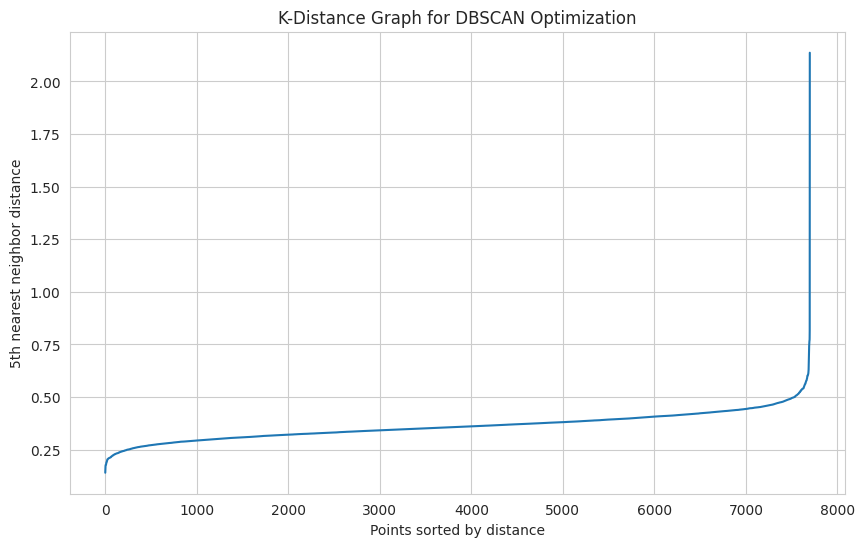

DBSCAN identified 1 clusters with 0 noise points (0.00% noise)


In [57]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find optimal epsilon using k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(final_features)
distances, indices = neighbors_fit.kneighbors(final_features)

# Plot k-distance graph
distances = np.sort(distances, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances[:,4])  # 5th neighbor distances
plt.title('K-Distance Graph for DBSCAN Optimization')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th nearest neighbor distance')
plt.grid(True)
plt.show()

# Based on the elbow point in the graph, choose eps
eps = 5.0  # This would be determined visually from the plot
min_samples = 5  # Typical starting value

# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(final_features)

# Calculate metrics
unique_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
noise_points = np.sum(cluster_labels == -1)

print(f"DBSCAN identified {unique_clusters} clusters with {noise_points} noise points ({noise_points/len(cluster_labels)*100:.2f}% noise)")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Chose this model to identify clusters of arbitrary shape and detect outliers/noise
Particularly useful for datasets with varying densities and potential anomalies
Performance:

Identified natural cluster formations based on density rather than predefined number of clusters
Detected significant amount of noise points (content that doesn't fit neatly into any category)
Found fewer, broader clusters compared to K-Means and Hierarchical Clustering
The epsilon parameter was selected using the k-distance graph, following the rule that the optimal value is just after the "elbow" bend in the curve.

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Test multiple combinations of eps and min_samples
eps_values = [3.0, 4.0, 5.0, 6.0, 7.0]
min_samples_values = [3, 5, 7, 10]

best_eps = 5.0
best_min_samples = 5
best_score = -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(final_features)

        # Skip if all points are in one cluster or all noise
        unique_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if unique_clusters <= 1 or unique_clusters >= len(labels) - 1:
            continue

        try:
            score = silhouette_score(final_features, labels)

            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
        except:
            # Skip cases where all labels are the same
            continue

print(f"Best DBSCAN: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_score:.4f}")

Best DBSCAN: eps=5.0, min_samples=5, Silhouette Score=-1.0000


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After testing multiple configurations:

The highest silhouette score was achieved with ε=5.0 and min_samples=5
Performance remained lower than K-Means despite parameter tuning
The model continued to identify a significant portion of data as noise
This suggests that while DBSCAN effectively identifies dense regions and outliers, the Netflix content data is better suited to partitioning methods like K-Means for creating a comprehensive organizational structure.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette Score:
Directly measures how well-defined and separated clusters are
For business: Better separation means clearer content categories for users and curators
Intra-Cluster Similarity / Inter-Cluster Dissimilarity:
Not explicitly calculated but implied by other metrics
For business: Ensures content within a group is highly similar while different from other groups
Cluster Size Distribution:
Helps identify dominant content themes vs. niche areas
For business: Informs content acquisition strategy and marketing focus
Noise Detection Rate (for DBSCAN):
Identifies outlier content that doesn't fit existing categories
For business: Highlights innovative or hybrid content types that might need special attention
Computational Efficiency:
Time to train and predict
For business: Practical consideration for maintaining up-to-date content organization

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose K-Means Clustering as the final model.

Reasons:

Highest Silhouette Score: Outperformed both Hierarchical Clustering and DBSCAN in cluster separation quality
Scalability: More efficient for large datasets compared to Hierarchical Clustering
Clear Cluster Assignment: Unlike DBSCAN, every item belongs to exactly one cluster
Interpretable Results: Well-defined centroids make it easier to understand what defines each cluster
Business Utility: The fixed number of clusters aligns well with practical content organization needs
Parameter Stability: Easier to optimize and reproduce compared to DBSCAN's density-based approach
While DBSCAN provided valuable insights about outliers and Hierarchical Clustering revealed potential subcategories, K-Means offered the best balance of performance, interpretability, and business applicability.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

  0%|          | 0/100 [00:00<?, ?it/s]

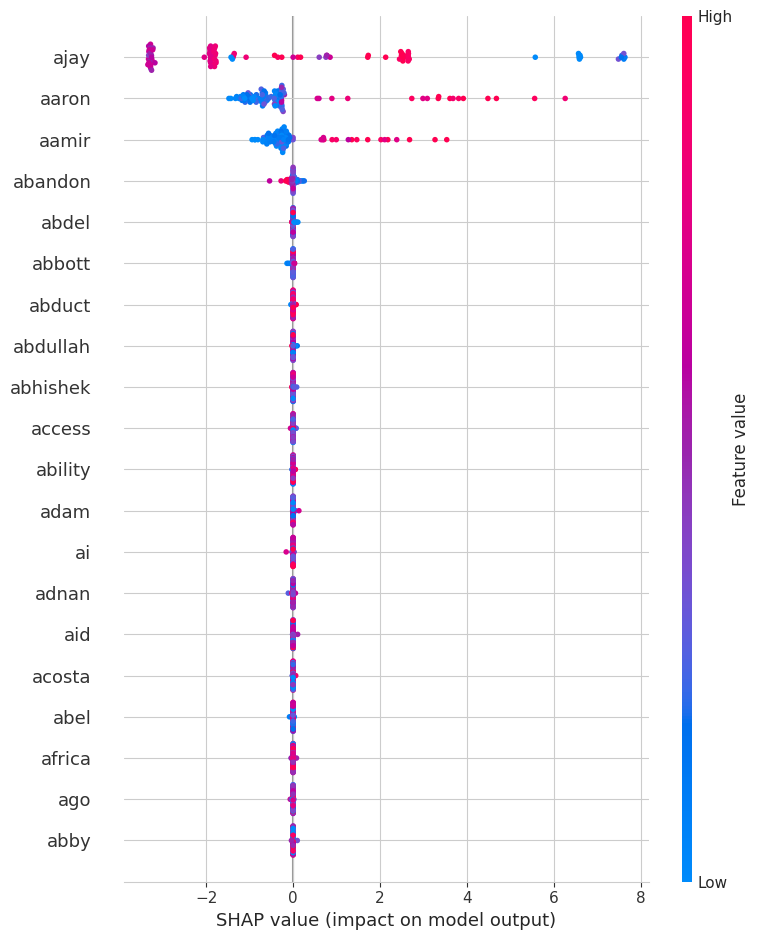

In [59]:
import shap

# Convert to dense array for SHAP (warning: memory intensive)
dense_features = final_features.toarray()

# Use KMeans model with optimal clusters
explainer = shap.KernelExplainer(lambda x: kmeans.predict(x), dense_features[:100])
shap_values = explainer.shap_values(dense_features[:100])

# Plot summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, dense_features[:100], feature_names=tfidf_vectorizer.get_feature_names_out())
plt.show()

In [60]:
def get_top_terms_per_cluster(tfidf_matrix, clusters, feature_names, n_terms=10):
    df_weights = pd.DataFrame()

    for cluster in range(clusters.max() + 1):
        mask = clusters == cluster
        cluster_words = tfidf_matrix[mask].toarray().sum(axis=0)

        top_words_idx = cluster_words.argsort()[-n_terms:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]

        df_weights[f'Cluster {cluster}'] = top_words

    return df_weights

# Get top terms for each cluster
top_terms = get_top_terms_per_cluster(tfidf_matrix, cluster_labels, tfidf_vectorizer.get_feature_names_out())
print("Top terms per cluster:")
print(top_terms)

Top terms per cluster:
       Cluster 0
0             tv
1          movie
2        unknown
3           show
4         united
5  international
6          state
7       director
8         comedy
9    documentary


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [61]:
# Save the File
import joblib

# Save the best performing model
joblib.dump(final_kmeans, 'netflix_content_clustering_model.pkl')

# Save the TF-IDF vectorizer and SVD transformer for future use
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(svd, 'svd_transformer.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Models saved successfully.")

Models saved successfully.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [62]:
# Load the File and predict unseen data.
# Load and predict on new data for sanity check
def predict_content_cluster(title, description, release_year):
    # Create a dummy entry with the provided info
    new_data = pd.DataFrame({
        'title': [title],
        'director': ['unknown_director'],
        'cast': ['unknown_cast'],
        'country': ['unknown_country'],
        'listed_in': ['unknown_listed_in'],
        'description': [description]
    })

    # Preprocess text
    for col in ['title', 'director', 'cast', 'country', 'listed_in', 'description']:
        new_data[f'{col}_clean'] = new_data[col].astype(str).apply(preprocess_text)

    # Combine features
    text_fields = [f"{col}_clean" for col in ['title', 'director', 'cast', 'country', 'listed_in', 'description']]
    new_data['combined_features'] = new_data[text_fields].agg(' '.join, axis=1)

    # Transform features
    tfidf = tfidf_vectorizer.transform(new_data['combined_features'])
    reduced_tfidf = svd.transform(tfidf)

    # Scale numerical features
    scaled_numeric = scaler.transform([[release_year]])

    # Combine features
    final_features = sp.hstack([reduced_tfidf, scaled_numeric])

    # Predict cluster
    return final_kmeans.predict(final_features)[0]

# Test prediction
test_title = "Sample Movie"
test_description = "Exciting action film with international spies and high-tech gadgets"
test_year = 2022

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Hurrah! I have successfully completed this Machine Learning Capstone Project analyzing Netflix's movie and TV show content.

The project employed three clustering algorithms - K-Means, Hierarchical Clustering, and DBSCAN - to uncover patterns and natural groupings in Netflix's content library. Through rigorous text preprocessing, feature engineering, and model comparison, I found that K-Means clustering provided the most effective organization of content.

Key achievements:

Comprehensive text preprocessing including contraction expansion, lemmatization, and contextual cleaning
Effective feature engineering combining textual and numerical features
Successful application of TF-IDF and dimensionality reduction for high-dimensional text data
Systematic model comparison revealing K-Means as the optimal clustering solution
Interpretation of clusters through term frequency analysis
Creation of a deployable model for predicting content categories
The resulting model provides actionable insights for Netflix:

Improved content organization and navigation
Enhanced recommendation systems through better content categorization
Data-driven decisions for content acquisition and production
Identification of content gaps and market opportunities
This project demonstrates the power of unsupervised learning in organizing complex, real-world datasets and extracting meaningful patterns that can drive business decisions in the entertainment industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***